# NEWS RECOMMENDER SYSTEM

## 1 Data prep and analysis

### 1.1 Data import and cleanup

In [752]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import sklearn
from sklearn import model_selection
from sklearn.metrics.pairwise import pairwise_distances 
import warnings
warnings.filterwarnings("ignore")

In [753]:
consumer_df = pd.read_csv("data\consumer_transanctions.csv")

In [754]:
consumer_df.head()

,event_timestamp,interaction_type,item_id,consumer_id,consumer_session_id,consumer_device_info,consumer_location,country
0,1465413032,content_watched,-3499919498720038879,-8845298781299428018,1264196770339959068,NaN,NaN,NaN
1,1465412560,content_watched,8890720798209849691,-1032019229384696495,3621737643587579081,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_2...,NY,US
2,1465416190,content_watched,310515487419366995,-1130272294246983140,2631864456530402479,NaN,NaN,NaN
3,1465413895,content_followed,310515487419366995,344280948527967603,-3167637573980064150,NaN,NaN,NaN
4,1465412290,content_watched,-7820640624231356730,-445337111692715325,561148 1178424124714,NaN,NaN,NaN


In [755]:
consumer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72312 entries, 0 to 72311
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   event_timestamp       72312 non-null  int64 
 1   interaction_type      72312 non-null  object
 2   item_id               72312 non-null  int64 
 3   consumer_id           72312 non-null  int64 
 4   consumer_session_id   72312 non-null  object
 5   consumer_device_info  56918 non-null  object
 6   consumer_location     56907 non-null  object
 7   country               56918 non-null  object
dtypes: int64(3), object(5)
memory usage: 4.4+ MB


In [756]:
item_df  = pd.read_csv('data\platform_content.csv')

In [757]:
item_df.head()

,event_timestamp,interaction_type,item_id,producer_id,producer_session_id,producer_device_info,producer_location,producer_country,item_type,item_url,title,text_description,language
0,1459192779,content_pulled_out,-6451309518266745024,4340306774493623681,8940341205206233829,NaN,NaN,NaN,HTML,http://www.nytimes.com/2016/03/28/business/dea...,"Ethereum, a Virtual Currency, Enables Transact...",All of this work is still very early. The firs...,en
1,1459193988,content_present,-4110354420726924665,4340306774493623681,8940341205206233829,NaN,NaN,NaN,HTML,http://www.nytimes.com/2016/03/28/business/dea...,"Ethereum, a Virtual Currency, Enables Transact...",All of this work is still very early. The firs...,en
2,1459194146,content_present,-7292285110016212249,4340306774493623681,8940341205206233829,NaN,NaN,NaN,HTML,http://cointelegraph.com/news/bitcoin-future-w...,Bitcoin Future: When GBPcoin of Branson Wins O...,The alarm clock wakes me at 8:00 with stream o...,en
3,1459194474,content_present,-6151852268067518688,3891637997717104548,-1457532940883382585,NaN,NaN,NaN,HTML,https://cloudplatform.googleblog.com/2016/03/G...,Google Data Center 360° Tour,We're excited to share the Google Data Center ...,en
4,1459194497,content_present,2448026894306402386,4340306774493623681,8940341205206233829,NaN,NaN,NaN,HTML,https://bitcoinmagazine.com/articles/ibm-wants...,"IBM Wants to ""Evolve the Internet"" With Blockc...",The Aite Group projects the blockchain market ...,en


In [758]:
print('Total number of consumers on the platform are ' ,consumer_df.consumer_id.nunique())
# Total 1895 consumers exist on the platform
print("Total number of consumer interactions on the platform", consumer_df.shape[0])

print("Total number of  records of items are ", item_df.shape[0])
print("Unique items present on platform are" , item_df.item_id.nunique())

print('Total number of items consumed are ' ,consumer_df.item_id.nunique())

# The consumers have interacted with 2987 unique items in total 


Total number of consumers on the platform are  1895
Total number of consumer interactions on the platform 72312
Total number of  records of items are  3122
Unique items present on platform are 3057
Total number of items consumed are  2987


In [759]:
# clean up duplicated items in item_df
item_df[item_df['item_id'].duplicated() ]

,event_timestamp,interaction_type,item_id,producer_id,producer_session_id,producer_device_info,producer_location,producer_country,item_type,item_url,title,text_description,language
59,1459345029,content_pulled_out,7973573994178035769,-8845298781299428018,3760091107461406486,NaN,NaN,NaN,HTML,http://noticias.uol.com.br/politica/ultimas-no...,Governo Dilma é desaprovado por 69% e aprovado...,Pesquisa Ibope encomendada pela Confederação N...,pt
84,1459367793,content_pulled_out,-7356135999773525293,-1443636648652872475,8209530310193218854,NaN,NaN,NaN,HTML,http://www.popsci.com/byzantine-science-deceiv...,Fooling The Machine,"Two groups, one at Berkeley University and ano...",en
87,1459367903,content_pulled_out,7420742904084384944,-1443636648652872475,8209530310193218854,NaN,NaN,NaN,HTML,http://www.popsci.com/byzantine-science-deceiv...,Fooling The Machine,"Two groups, one at Berkeley University and ano...",en
90,1459368576,content_pulled_out,8219310215587599928,-1443636648652872475,8209530310193218854,NaN,NaN,NaN,HTML,http://www.popsci.com/byzantine-science-deceiv...,Fooling The Machine,"Two groups, one at Berkeley University and ano...",en
210,1459867906,content_pulled_out,-6499865726739947794,6003902177042843076,9221043291398421991,NaN,NaN,NaN,HTML,http://techcrunch.com/2016/04/04/microsofts-mo...,Microsoft's mobile problem may not be a proble...,When Microsoft announced its Windows 10 strate...,en
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2824,1480942004,content_pulled_out,4169374063813159761,2612012348742830907,-2359713986954060163,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,SP,BR,HTML,http://noticias.uol.com.br/politica/ultimas-no...,"Brasil gasta R$ 16,4 mi ao ano com aposentador...",iStock Uso do cargo para beneficiar loja maçôn...,pt
2874,1481740935,content_pulled_out,8289800212949675494,-8241940599580729220,-4005961876543065182,Mozilla/5.0 (Windows NT 10.0; WOW64) AppleWebK...,MG,BR,HTML,http://making.duolingo.com/which-countries-stu...,"Which countries study which languages, and wha...",To find out which languages are the most popul...,en
2942,1484047628,content_pulled_out,-5924653357616257702,-4246040813531967142,-4748637958812360523,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,SP,BR,HTML,http://exame.abril.com.br/tecnologia/robo-da-i...,Robô da IBM substitui 34 funcionários de empre...,"São Paulo - O Watson, que a empresa define com...",pt
3008,1485342148,content_pulled_out,-7358932766266901263,-8420584158427265596,-1843663387254811608,Mozilla/5.0 (Windows NT 10.0; WOW64) AppleWebK...,SP,BR,HTML,http://www.coindesk.com/three-smart-contract-m...,Why Many Smart Contract Use Cases Are Simply I...,Dr Gideon Greenspan is the founder and CEO of ...,en


In [760]:
#Some of the items are reported twice once as content_present & once as content_pulled_out records.
item_df = item_df.drop_duplicates(subset = 'item_id', keep = 'first') 
item_df[item_df['interaction_type'] == 'content_pulled_out']

# only 10 items content pulled out items. We'll keep them for now and filterout from recommendatios list if they appear there.

,event_timestamp,interaction_type,item_id,producer_id,producer_session_id,producer_device_info,producer_location,producer_country,item_type,item_url,title,text_description,language
0,1459192779,content_pulled_out,-6451309518266745024,4340306774493623681,8940341205206233829,NaN,NaN,NaN,HTML,http://www.nytimes.com/2016/03/28/business/dea...,"Ethereum, a Virtual Currency, Enables Transact...",All of this work is still very early. The firs...,en
70,1459355695,content_pulled_out,8078873160882064481,3891637997717104548,1776955132850411647,NaN,NaN,NaN,HTML,http://buytaert.net/white-house-deepens-its-co...,Dries Buytaert,White House deepens its commitment to Open Sou...,en
388,1460566398,content_pulled_out,-8418620743404378592,-2050699458865052139,439898712475129302,NaN,NaN,NaN,VIDEO,https://www.facebook.com/brasilART/videos/1241...,BrasilART - Efeito Paralax e Câmera Multiplano...,"Neste vídeo, Walt Disney explica o ""Efeito Par...",pt
755,1462290994,content_pulled_out,4739732607073456292,8676130229735483748,7996351703382861075,NaN,NaN,NaN,HTML,http://www.imdb.com/title/tt1069238/,Departures (2008),Storyline Daigo Kobayashi is a devoted cellist...,en
756,1462291023,content_pulled_out,-8112397019636931887,8676130229735483748,7996351703382861075,NaN,NaN,NaN,HTML,http://www.imdb.com/title/tt1069238/,Departures (2008),Storyline Daigo Kobayashi is a devoted cellist...,en
824,1462477485,content_pulled_out,1556878199027930272,-7531858294361854119,5275115740953102848,NaN,NaN,NaN,HTML,http://www.melhoresdestinos.com.br/aeronave-de...,TAM recebe primeira aeronave com o design e pi...,Como um dos passos mais importantes para a con...,pt
951,1463147569,content_pulled_out,-1172724258904585136,-2726721797588771398,-6383156192411281601,NaN,NaN,NaN,HTML,https://blog.ryantoohil.com/category/google-ca...,TNSFF,Katie was managing 4 or 5 different versions o...,en
1554,1467119696,content_pulled_out,3823268327704412514,6003902177042843076,455575906717568567,NaN,NaN,NaN,HTML,http://techcrunch.com/2016/02/24/facebook-reac...,"Facebook Enhances Everyone's Like With Love, H...",Humanity has been boiled down to six emotions....,en
1555,1467119738,content_pulled_out,1179326165172129711,6003902177042843076,455575906717568567,NaN,NaN,NaN,HTML,http://gizmodo.uol.com.br/vies-numeros-primos/,Matemáticos descobrem um padrão inesperado nos...,Os matemáticos descobriram um padrão surpreend...,pt
2227,1472564125,content_pulled_out,-729129249377835720,3734911646343191965,-4074109168227169139,NaN,NaN,NaN,HTML,https://news.spotify.com/us/2016/02/23/announc...,The Spotify Blog,Editor's Note: This blog post was written by N...,en


In [761]:
# drop the  transient info- no use for decision making or analysis
consumer_df.drop(['event_timestamp', 'consumer_session_id', 'consumer_device_info' ], axis = 1, inplace = True)

In [762]:
# replance Na's in location to UNKWN (Unknown)
consumer_df.consumer_location.fillna('UNKWN', inplace = True)  
consumer_df.country.fillna('UNKWN', inplace = True)

In [763]:
# drop the  transient info- no use for decision making or analysis
item_df.drop(['event_timestamp', 'producer_session_id', 'producer_device_info','item_url' ], axis = 1, inplace = True)

In [764]:
# deduce rating field from implicit info from usr interaction
#def rating_values(x):
rating_map = {'content_watched':1, 'content_liked':2 , 'content_saved':3 ,'content_commented_on':4,'content_followed':5}
consumer_df['rating'] = consumer_df['interaction_type'].map(rating_map)

In [765]:
consumer_df['interaction_type'].value_counts()

interaction_type
content_watched         61086
content_liked            5745
content_saved            2463
content_commented_on     1611
content_followed         1407
Name: count, dtype: int64

In [766]:
# we are using rating(driven from interaction_type field only, so interaction_type can be dropped
consumer_df.drop('interaction_type', axis =1, inplace = True )

### 1.2 EDA

In [767]:
consumer_df.info()
# DATA CLEANED UP!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72312 entries, 0 to 72311
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   item_id            72312 non-null  int64 
 1   consumer_id        72312 non-null  int64 
 2   consumer_location  72312 non-null  object
 3   country            72312 non-null  object
 4   rating             72312 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 2.8+ MB


In [768]:
item_df.head()

,interaction_type,item_id,producer_id,producer_location,producer_country,item_type,title,text_description,language
0,content_pulled_out,-6451309518266745024,4340306774493623681,NaN,NaN,HTML,"Ethereum, a Virtual Currency, Enables Transact...",All of this work is still very early. The firs...,en
1,content_present,-4110354420726924665,4340306774493623681,NaN,NaN,HTML,"Ethereum, a Virtual Currency, Enables Transact...",All of this work is still very early. The firs...,en
2,content_present,-7292285110016212249,4340306774493623681,NaN,NaN,HTML,Bitcoin Future: When GBPcoin of Branson Wins O...,The alarm clock wakes me at 8:00 with stream o...,en
3,content_present,-6151852268067518688,3891637997717104548,NaN,NaN,HTML,Google Data Center 360° Tour,We're excited to share the Google Data Center ...,en
4,content_present,2448026894306402386,4340306774493623681,NaN,NaN,HTML,"IBM Wants to ""Evolve the Internet"" With Blockc...",The Aite Group projects the blockchain market ...,en


In [769]:
item_df.interaction_type.value_counts()

#OBSERVATION: 75 items are not avaialble for recommendation and will be removed before modelling 

interaction_type
content_present       3047
content_pulled_out      10
Name: count, dtype: int64

In [770]:
item_df.language.value_counts()
# most of the items belong to English followed by Purtegese language. rest language items are only handful

language
en    2218
pt     832
la       3
es       2
ja       2
Name: count, dtype: int64

In [771]:
item_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3057 entries, 0 to 3121
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   interaction_type   3057 non-null   object
 1   item_id            3057 non-null   int64 
 2   producer_id        3057 non-null   int64 
 3   producer_location  669 non-null    object
 4   producer_country   669 non-null    object
 5   item_type          3057 non-null   object
 6   title              3057 non-null   object
 7   text_description   3057 non-null   object
 8   language           3057 non-null   object
dtypes: int64(2), object(7)
memory usage: 238.8+ KB


In [772]:
item_df.item_type.value_counts()

item_type
HTML     3036
VIDEO      11
RICH       10
Name: count, dtype: int64

In [773]:
item_df.producer_location.value_counts()

producer_location
SP     524
MG      73
NY      20
NJ      16
GA       7
IL       6
ON       4
RJ       4
NSW      2
TX       2
SC       2
?        2
RI       1
AB       1
FL       1
WA       1
13       1
CA       1
MS       1
Name: count, dtype: int64

In [774]:
item_df.info()

# ALl cleaned up!

<class 'pandas.core.frame.DataFrame'>
Index: 3057 entries, 0 to 3121
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   interaction_type   3057 non-null   object
 1   item_id            3057 non-null   int64 
 2   producer_id        3057 non-null   int64 
 3   producer_location  669 non-null    object
 4   producer_country   669 non-null    object
 5   item_type          3057 non-null   object
 6   title              3057 non-null   object
 7   text_description   3057 non-null   object
 8   language           3057 non-null   object
dtypes: int64(2), object(7)
memory usage: 238.8+ KB


In [775]:
title_font= {'family': 'serif',
              'color':  'darkred',
              'weight': 'normal',
              'size': 16}
label_font = {'family': 'sans-serif',
              'color':  'darkblue',
              'weight': 'bold',
              'size': 12}

#### 1.3.1 Types of consumer interactions

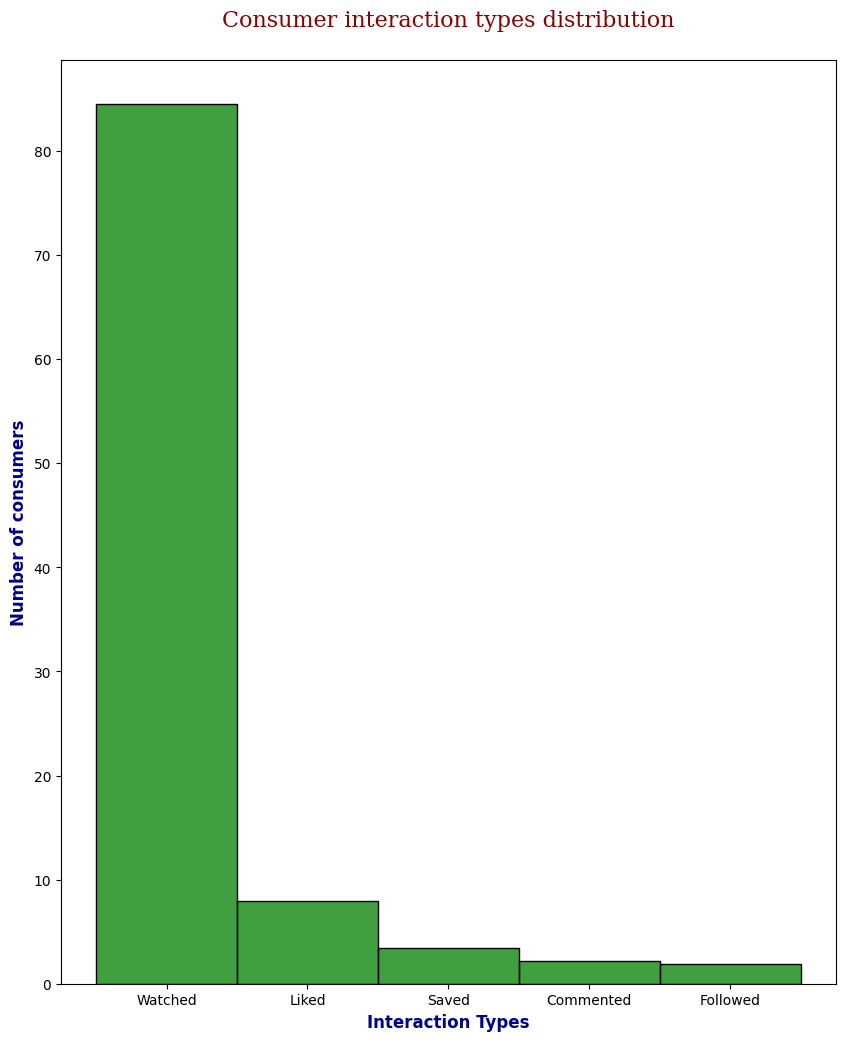

In [776]:
rating_map2 = {1:'Watched', 2:'Liked' , 3:'Saved' ,4:'Commented',5:'Followed'}
labels = list(rating_map2.values())
plt.figure(figsize = (10,12))
ax  = sn.histplot(data = consumer_df, x = consumer_df['rating'], stat='percent',discrete = True, color ='green' )
ax.set_title( "Consumer interaction types distribution\n" , fontdict = title_font)
ax.set_xlabel("Interaction Types\n", fontdict = label_font)
ax.set_xticks(ticks = list(rating_map2.keys()), labels =  labels )
ax.set_ylabel('Number of consumers', fontdict = label_font)
plt.show()


# In more than 80% interactions, consumers only watch the items, followed by Liked, Saved and so on.

#### 1.3.2 Consumer Country distribution

In [777]:
unique_consumers = consumer_df.drop_duplicates(subset = 'consumer_id', keep = 'first') 
unique_consumers.groupby('country')['consumer_id'].count()

country
BR       1469
CA          1
JP          8
KR         34
UNKWN     319
US         63
ZZ          1
Name: consumer_id, dtype: int64

In [778]:
country_map = {'AUS':'Australia', 'BR':'Brazil','CA' :'Canada', 'JP': 'Japan', 'KR': 'Korea', 'PT':'Portugal','US' :'USA', 'ZZ': 'Unspecified', 'UNKWN': 'Unknown'}
country_ticks =list( country_map.keys())
#tick_positions.sort() # [1, 2, 3, 4]
country_labels = [country_map[pos] for pos in country_ticks]

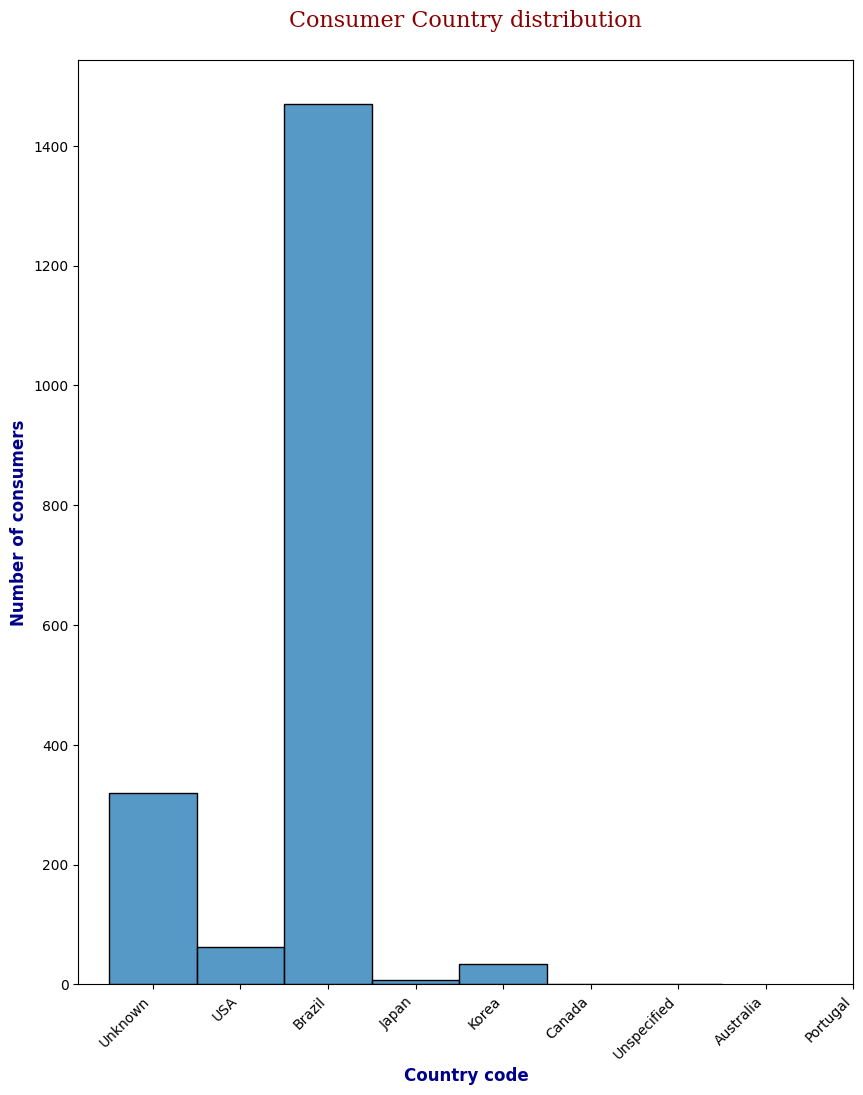

In [779]:
plt.figure(figsize = (10,12))
ax  = sn.histplot(unique_consumers['country'], stat='count',discrete=True)
ax.set_xticks(ticks = country_ticks , labels = country_labels,rotation=45, ha='right')
ax.set_title("Consumer Country distribution\n", fontdict = title_font)
ax.set_xlabel('Country code', fontdict = label_font)
ax.set_ylabel('Number of consumers', fontdict = label_font)

plt.show()
                   
# 319 counsumers have unknown location(marked as UNKNWN) and rest of them majorly come from 2 countries Brazil & USA. A few handful come from Korea & Japan, Canada)

#### 1.3.3 Item consumption by language

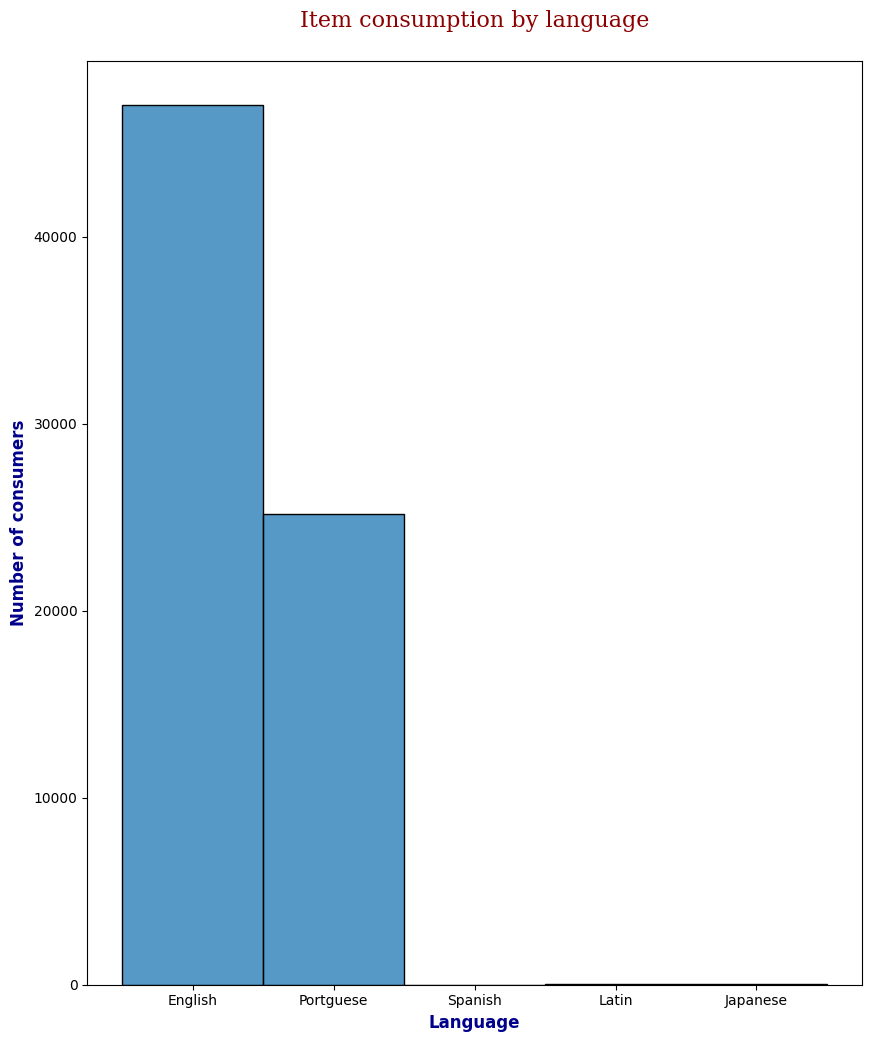

In [780]:
# Item consumption by language
lang_merged = pd.merge(consumer_df, item_df, on = 'item_id', how=  'left') [['consumer_id', 'language']]
lang_map = {'en': 'English', 'pt': 'Portguese', 'es': 'Spanish', 'la': 'Latin', 'ja': 'Japanese'}
lang_tick = list(lang_map.keys())
lang_labels  = [lang_map[pos] for pos in lang_tick]
plt.figure(figsize = (10,12))
ax  =sn.histplot(data = lang_merged, x =  'language')
ax.set_title("Item consumption by language\n", fontdict = title_font)
ax.set_xlabel('Language', fontdict = label_font)
ax.set_ylabel('Number of consumers', fontdict = label_font)
ax.set_xticks(ticks = lang_tick , labels = lang_labels )
plt.show()

# Moer than 45000 (About 65% ) of all the items consume  are English items while ~34.5% are in Portugese lang.  Rest lang consumption is negligible.

In [781]:
consumer_lang_percent = lang_merged.groupby('language').count()
consumer_lang_percent = consumer_lang_percent/consumer_lang_percent['consumer_id'].sum()*100
consumer_lang_percent = consumer_lang_percent.rename(columns = {'consumer_id': "Percent_consumption"})
consumer_lang_percent



,Percent_consumption
language,
en,65.087399
es,0.009680
ja,0.047018
la,0.074676
pt,34.781226


#### 1.3.4 Consumer location distribution

In [782]:
# let us look at top 10 locations from our consumer base 

tx = consumer_df.consumer_location.value_counts()
tx.head(10)

consumer_location
SP       40164
UNKWN    15405
MG       10229
NY        1257
TX         923
GA         910
RJ         775
NJ         698
?          327
CA         238
Name: count, dtype: int64

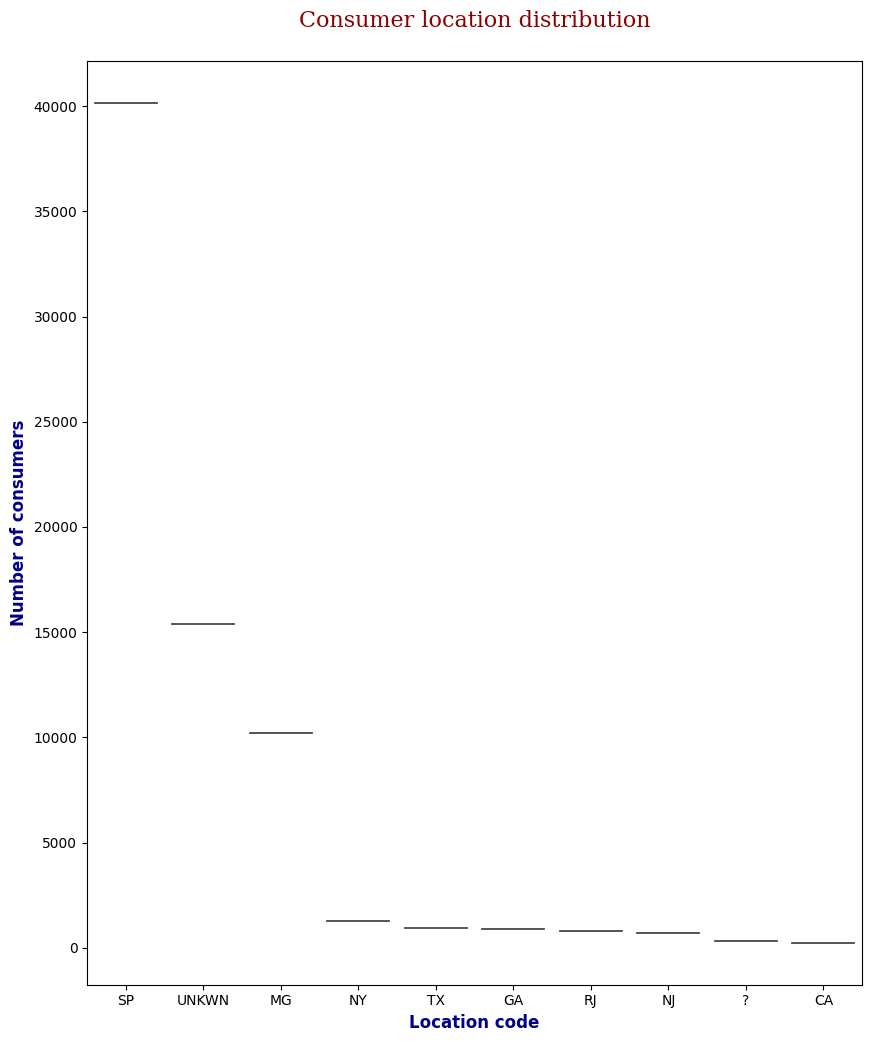

In [783]:
# let us look at top 10 locations from our consumer base  
consumer_locations = consumer_df.consumer_location.value_counts().head(10).reset_index()
plt.figure(figsize = (10,12))
ax  =sn.violinplot(data = consumer_df, x =  consumer_locations['consumer_location'], y =  consumer_locations['count'])
ax.set_title("Consumer location distribution\n", fontdict = title_font)
ax.set_xlabel('Location code', fontdict = label_font)
ax.set_ylabel('Number of consumers', fontdict = label_font)
plt.show()
# A lot of consumers have unknown location(marked as UNKN) and rest of them majorly come from few selected locations

#### 1.3.5 Item Types

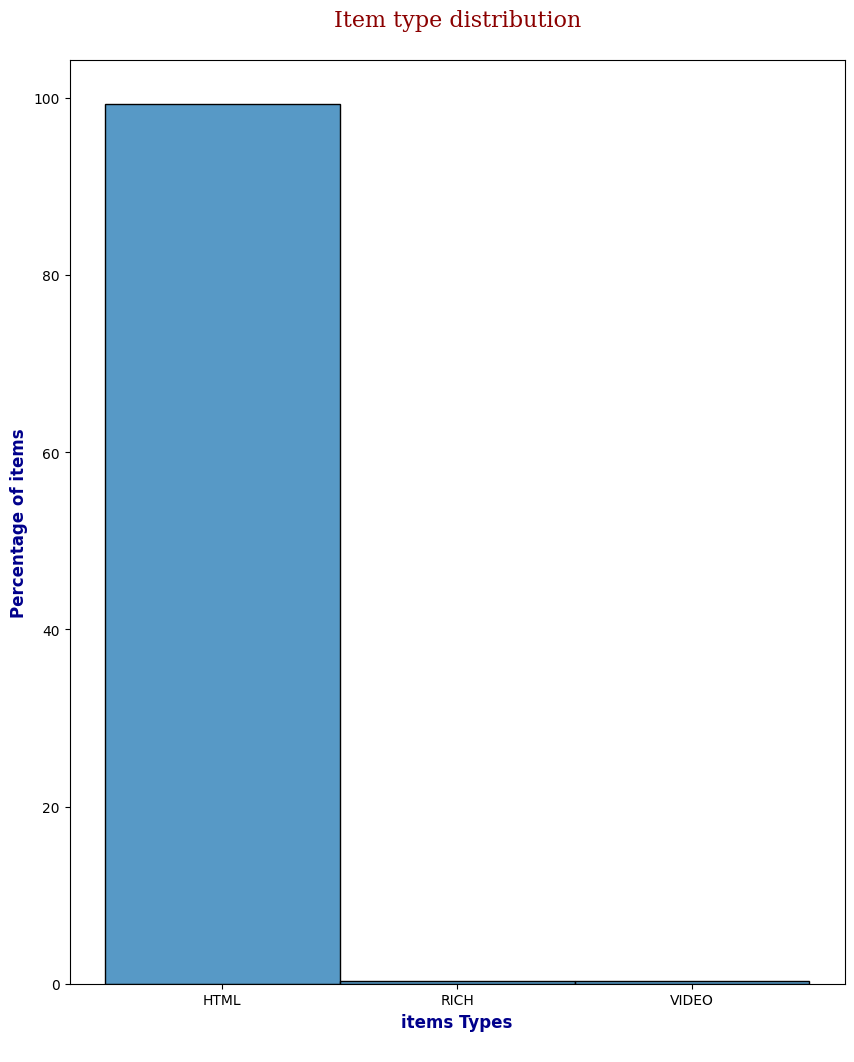

In [784]:
plt.figure(figsize = (10,12))
#rating_info = consumer_df['rating'].map(rating_map)
ax  = sn.histplot(data = item_df,x = 'item_type', stat = 'percent')
ax.set_title( "Item type distribution\n" , fontdict = title_font)
ax.set_xlabel("items Types\n", fontdict = label_font)
#ax.set_xticklabels(labels = labels )
ax.set_ylabel('Percentage of items', fontdict = label_font)
plt.show()

# majority of the items are HTML pages with handful of Rich text or video data. we can safely remove non-HTML data to keep it relevant for text items only

#### 1.3.6 Item language type

In [785]:
item_df.groupby('language').count().item_id

language
en    2218
es       2
ja       2
la       3
pt     832
Name: item_id, dtype: int64

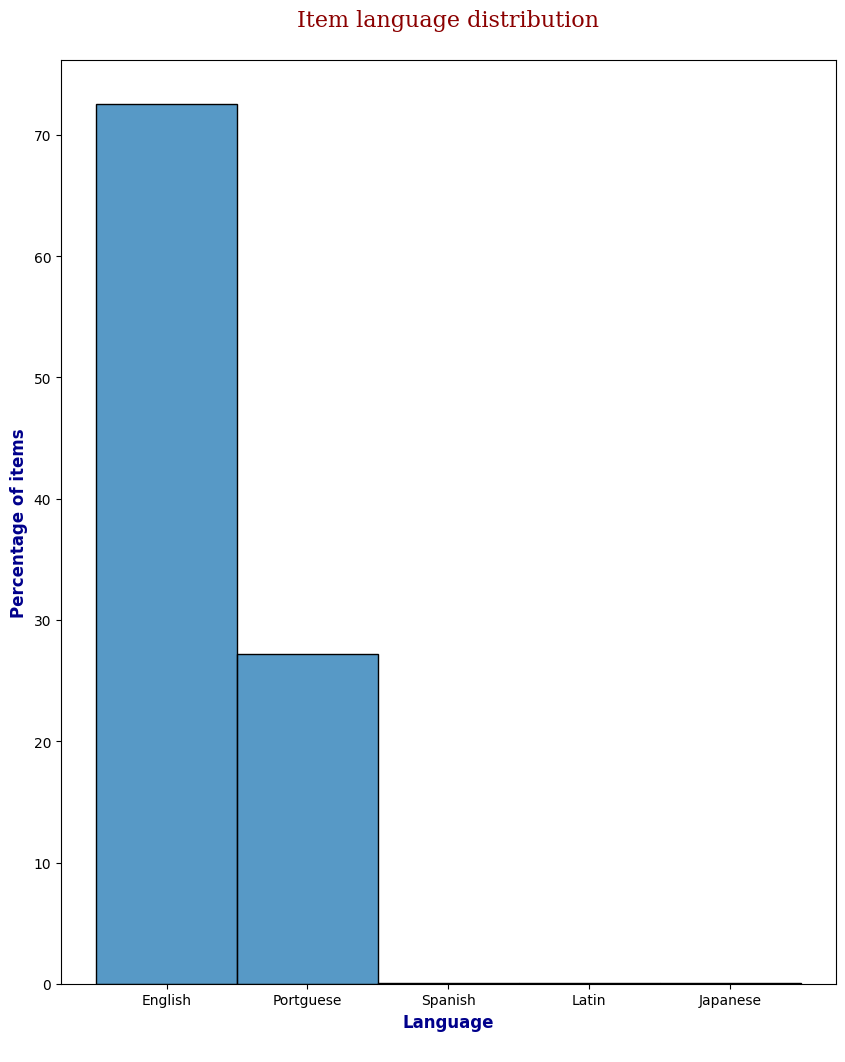

In [786]:
plt.figure(figsize = (10,12))
ax  = sn.histplot(data = item_df,x = 'language', stat = 'percent')
ax.set_title( "Item language distribution\n" , fontdict = title_font)
ax.set_xlabel("Language\n", fontdict = label_font)
ax.set_xticks(ticks = lang_tick,  labels = lang_labels )
ax.set_ylabel('Percentage of items', fontdict = label_font)
plt.show()

# OBSERVATION: More than 70% of items belong to English followed by Purtegese language. Only a handful of articles in spanish & other lang. 
#This explains why the consumption of these lang items in section 1.3.4 is so low.

#### 1.3.7 Item Production data

In [787]:
item_df[item_df['producer_country'].isna()].count()/ len(item_df)

#  2388 items- 78% of items dont have production country information.

interaction_type     0.781158
item_id              0.781158
producer_id          0.781158
producer_location    0.000000
producer_country     0.000000
item_type            0.781158
title                0.781158
text_description     0.781158
language             0.781158
dtype: float64

In [788]:
item_country_percent = item_df.groupby('producer_country').count()['item_id']
#item_country_percent = item_country_percent/item_country_percent.sum()*100
item_country_percent

producer_country
AU      2
BR    602
CA      5
PT      1
US     59
Name: item_id, dtype: int64

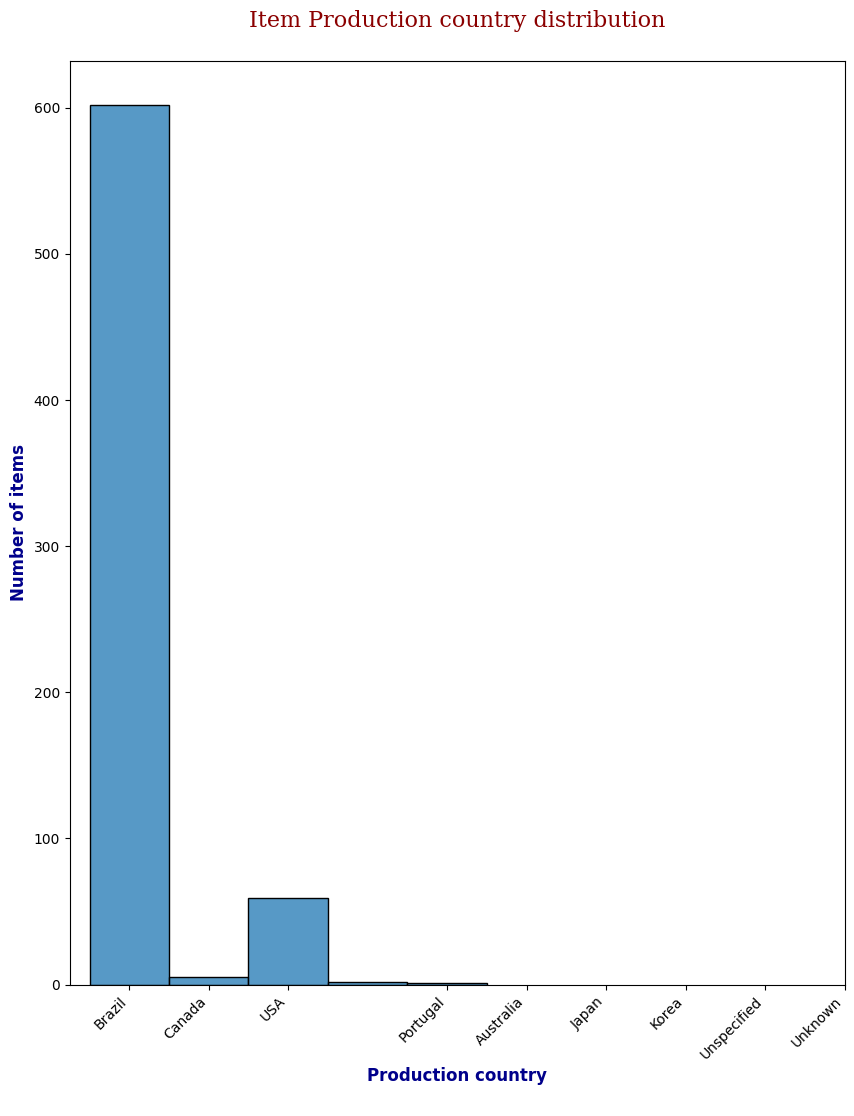

In [789]:
plt.figure(figsize = (10,12))
ax  = sn.histplot(data = item_df[item_df['producer_country'].notna()] ,x = 'producer_country', stat = 'count')
ax.set_title( "Item Production country distribution\n" , fontdict = title_font)
ax.set_xlabel("Production country\n", fontdict = label_font)
ax.set_xticks(ticks = country_ticks , labels = country_labels, rotation=45, ha='right') 
ax.set_ylabel('Number of items', fontdict = label_font)
plt.show()

# Out of all items, only about 20% items for which production country info is available. Most of those items are orgininated in Brazil followed by USA 

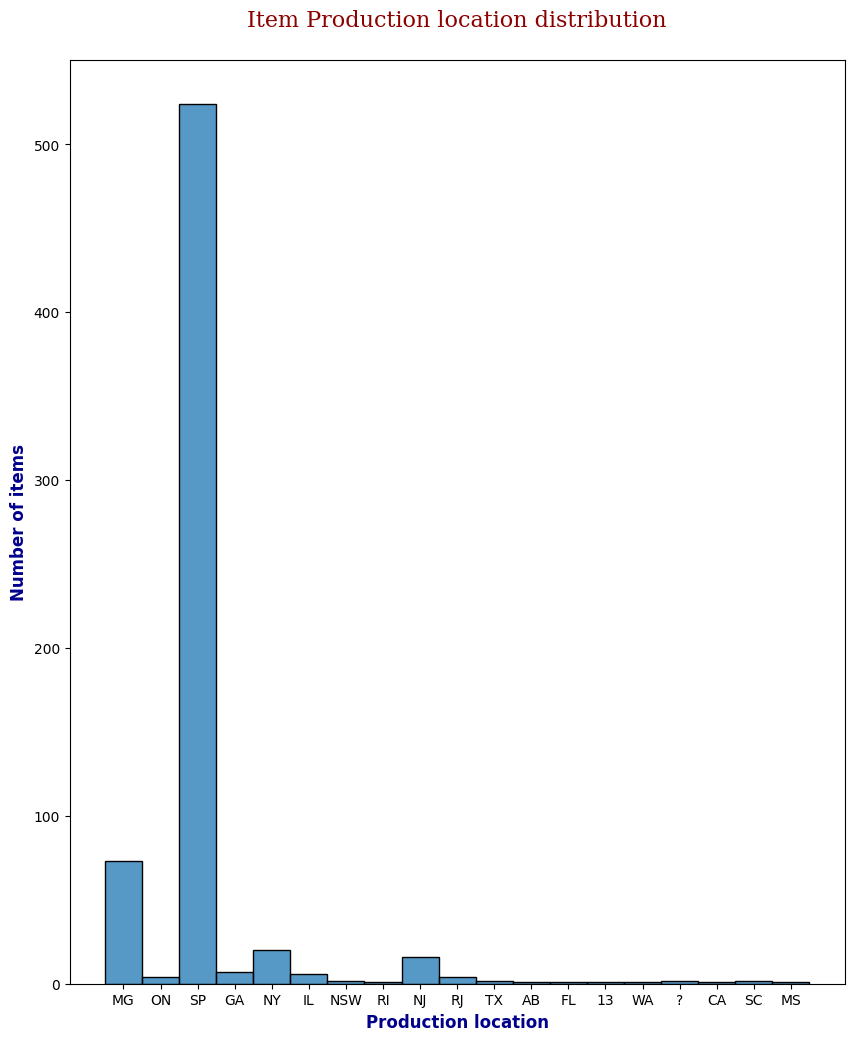

In [790]:
plt.figure(figsize = (10,12))
ax  = sn.histplot(data = item_df[item_df["producer_location"].notna()] ,x = 'producer_location', stat = 'count')
ax.set_title( "Item Production location distribution\n" , fontdict = title_font)
ax.set_xlabel("Production location\n", fontdict = label_font)
ax.set_ylabel('Number of items', fontdict = label_font)
plt.show()

# OBSERVATION: For items whose location info is avaialble, most of the items production comes from SP, MG 
#(most likely São Paulo & Minas Gerais in Brazil as most of consumers are from Brazil)

#### 1.3.8 Top consumed item's producers vs interaction type

In [791]:
#x = merged_df.groupby(['producer_id'])[['interaction', 'producer_id']]

merged_df = pd.merge(consumer_df, item_df, on = 'item_id', how = 'left')[['consumer_id', "item_id", 'rating', 'producer_id']]
merged_df['interaction'] = merged_df['rating'].map(rating_map2)
producer_df = merged_df.groupby(['producer_id', 'interaction']).count().sort_values(by = 'item_id', ascending = False).head(10)
producer_df = producer_df.reset_index()
producer_df = producer_df.reset_index()
producer_df

,index,producer_id,interaction,consumer_id,item_id,rating
0,0,-1032019229384696495,Watched,5519,5519,5519
1,1,3609194402293569455,Watched,4452,4452,4452
2,2,-1443636648652872475,Watched,3876,3876,3876
3,3,7645894863578715801,Watched,1873,1873,1873
4,4,6013226412048763966,Watched,1757,1757,1757
5,5,3891637997717104548,Watched,1688,1688,1688
6,6,-8020832670974472349,Watched,1493,1493,1493
7,7,1895326251577378793,Watched,1435,1435,1435
8,8,-709287718034731589,Watched,1320,1320,1320
9,9,-4465926797008424436,Watched,1033,1033,1033


In [792]:
item_df['producer_id'].nunique()

252

In [793]:
producer_df.rating.sum()/len(consumer_df)*100

np.float64(33.80628388096028)

In [794]:
producer_df.rating.sum()

np.int64(24446)

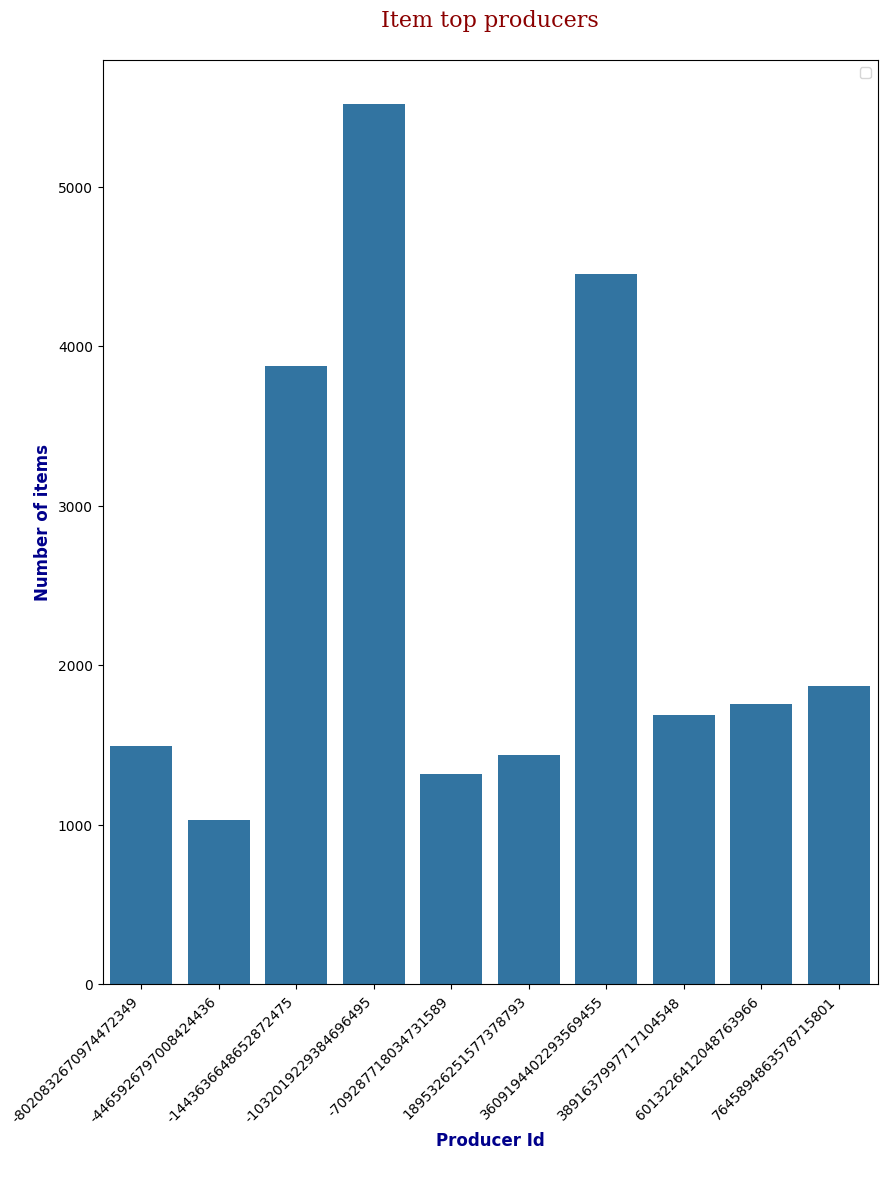

In [795]:
plt.figure(figsize = (10,12))
ax  = sn.barplot(data = producer_df ,x = 'producer_id', y= 'item_id')
ax.set_title( "Item top producers\n" , fontdict = title_font)
ax.set_xlabel("Producer Id\n", fontdict = label_font)
plt.xticks(rotation=45, ha='right')
ax.set_ylabel('Number of items', fontdict = label_font)
plt.legend()
plt.show()


#### 1.3.9 EDA OBSERVATIONS

- Total 72312 interactions are reported on the platform.  Total 1895 unique consumers are present on the platform. Total 3057 unique items are available.
- Out of toal items in platform( 3057), 2987 items - i.e. ~97% of the items have been consumed by one or more consumers. So only 3% items has gone unnoticed. 
- Brazil is most popular country consuming more than 80% of the items on the platform
- About 78% items don't have production country information. 19% of content comes from Brazil and remaining handful are from USA, Canada, Japan, Australia and Portugal. More information is needed here for any significant  analysis on basis of item production language. 
- More than 72% of item present on the platform are in English and ~27 % is Portugese. rest of the lang items(Spanish, Latin, Japan) are negligible
- In more than 85% of the interaction, consumer are only watching the items. less number of comment/save/like/follow activity. 
- Apart from handful of the items, most of the items are HTML docs
- ~34% of consumption is credited to 10 producers(out of total 252 producers). 

## 2 Collabration filtering recommendations

- To drive the recommendations based on user similarity, we'll use consumer_df to work out the similarities

### 2.1 Data preprocessing

Add consumer_no and item_no fields for data matrix. Ids will be linked back for recommendation output later 

In [796]:
consumer_df['consumer_no']= pd.factorize(consumer_df['consumer_id'])[0]
consumer_df

,item_id,consumer_id,consumer_location,country,rating,consumer_no
0,-3499919498720038879,-8845298781299428018,UNKWN,UNKWN,1,0
1,8890720798209849691,-1032019229384696495,NY,US,1,1
2,310515487419366995,-1130272294246983140,UNKWN,UNKWN,1,2
3,310515487419366995,344280948527967603,UNKWN,UNKWN,5,3
4,-7820640624231356730,-445337111692715325,UNKWN,UNKWN,1,4
...,...,...,...,...,...,...
72307,-6590819806697898649,-9016528795238256703,MG,BR,2,52
72308,-5813211845057621660,102305705598210278,SP,BR,1,788
72309,-1999468346928419252,-9196668942822132778,SP,BR,1,1670
72310,-6590819806697898649,-9016528795238256703,MG,BR,1,52


In [797]:
item_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3057 entries, 0 to 3121
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   interaction_type   3057 non-null   object
 1   item_id            3057 non-null   int64 
 2   producer_id        3057 non-null   int64 
 3   producer_location  669 non-null    object
 4   producer_country   669 non-null    object
 5   item_type          3057 non-null   object
 6   title              3057 non-null   object
 7   text_description   3057 non-null   object
 8   language           3057 non-null   object
dtypes: int64(2), object(7)
memory usage: 238.8+ KB


In [798]:
item_df['item_no']= pd.factorize(item_df['item_id'])[0]
item_df

,interaction_type,item_id,producer_id,producer_location,producer_country,item_type,title,text_description,language,item_no
0,content_pulled_out,-6451309518266745024,4340306774493623681,NaN,NaN,HTML,"Ethereum, a Virtual Currency, Enables Transact...",All of this work is still very early. The firs...,en,0
1,content_present,-4110354420726924665,4340306774493623681,NaN,NaN,HTML,"Ethereum, a Virtual Currency, Enables Transact...",All of this work is still very early. The firs...,en,1
2,content_present,-7292285110016212249,4340306774493623681,NaN,NaN,HTML,Bitcoin Future: When GBPcoin of Branson Wins O...,The alarm clock wakes me at 8:00 with stream o...,en,2
3,content_present,-6151852268067518688,3891637997717104548,NaN,NaN,HTML,Google Data Center 360° Tour,We're excited to share the Google Data Center ...,en,3
4,content_present,2448026894306402386,4340306774493623681,NaN,NaN,HTML,"IBM Wants to ""Evolve the Internet"" With Blockc...",The Aite Group projects the blockchain market ...,en,4
...,...,...,...,...,...,...,...,...,...,...
3117,content_present,9213260650272029784,3609194402293569455,SP,BR,HTML,"Conheça a Liga IoT, plataforma de inovação abe...","A Liga Ventures, aceleradora de startups espec...",pt,3052
3118,content_present,-3295913657316686039,6960073744377754728,GA,US,HTML,Amazon takes on Skype and GoToMeeting with its...,"Amazon has launched Chime, a video conferencin...",en,3053
3119,content_present,3618271604906293310,1908339160857512799,SP,BR,HTML,Code.org 2016 Annual Report,"February 9, 2017 - We begin each year with a l...",en,3054
3120,content_present,6607431762270322325,-1393866732742189886,MG,BR,HTML,JPMorgan Software Does in Seconds What Took La...,"At JPMorgan Chase & Co., a learning machine is...",en,3055


In [799]:
consumer_df2 = pd.merge(consumer_df, item_df, on ='item_id', how = 'left')[['consumer_no', 'item_no', 'rating']]

In [800]:
# take only relevant fields
#consumer_df2 = consumer_df['customer_no','item_no', 'rating']
item_df2 = item_df[['item_no', 'item_id', 'text_description']]

In [801]:
consumer_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72312 entries, 0 to 72311
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   consumer_no  72312 non-null  int64
 1   item_no      72312 non-null  int64
 2   rating       72312 non-null  int64
dtypes: int64(3)
memory usage: 1.7 MB


In [802]:
item_df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3057 entries, 0 to 3121
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   item_no           3057 non-null   int64 
 1   item_id           3057 non-null   int64 
 2   text_description  3057 non-null   object
dtypes: int64(2), object(1)
memory usage: 95.5+ KB


In [803]:
consumer_df2.rating.value_counts()

rating
1    61086
2     5745
3     2463
4     1611
5     1407
Name: count, dtype: int64

In [804]:
consumer_df2.head()

,consumer_no,item_no,rating
0,0,1247,1
1,1,1236,1
2,2,1267,1
3,3,1267,5
4,4,1271,1


In [805]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(consumer_df2, test_size=0.2, random_state=31)

In [806]:
print(train.shape)
print(test.shape)

(57849, 3)
(14463, 3)


In [807]:
train.head()

,consumer_no,item_no,rating
9257,137,763,2
71686,30,1972,1
23556,20,137,1
51229,610,2293,5
9583,147,649,1


### 2.2 Data Matrices

In [808]:
n_users = consumer_df2.consumer_no.nunique()
n_items = item_df2.item_no.nunique()   

print(n_users, n_items)

1895 3057


In [809]:
# create empty user-item matrices for train and test data
data_matrix_train = np.zeros((n_users, n_items))
data_matrix_test = np.zeros((n_users, n_items))

print(data_matrix_train.shape, data_matrix_test.shape)

(1895, 3057) (1895, 3057)


In [810]:
for line in train.itertuples():
    data_matrix_train[line[1]-1, line[2]-1] = line[3]

for line in test.itertuples():
    data_matrix_test[line[1]-1, line[2]-1] = line[3]

In [811]:
data_matrix_train

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [812]:
#Create Data Matrix with full data

data_matrix_full = np.zeros((n_users, n_items))
for line in consumer_df2.itertuples():
    data_matrix_full[line[1]-1, line[2]-1] = line[3]
data_matrix_full

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

### 2.3 Recommendations on user similarity basis
- We'll be using user similarity matrices to drive the similarity between the items

#### User similarity matrix

In [813]:
consumer_similarity = 1- pairwise_distances(data_matrix_train, metric='cosine')
consumer_similarity

array([[1.        , 0.11070689, 0.04975186, ..., 0.        , 0.        ,
        0.19653845],
       [0.11070689, 1.        , 0.10943513, ..., 0.05471757, 0.        ,
        0.05535673],
       [0.04975186, 0.10943513, 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.05471757, 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.19653845, 0.05535673, 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [814]:
data_matrix_train.shape

(1895, 3057)

In [815]:
consumer_similarity.shape

(1895, 1895)

In [816]:
data_matrix_full.shape

(1895, 3057)

#### Predictions for a user

In [817]:
# use user's similarity matrices to predict the ratings of all items in test data for each user
all_predictions = np.dot(consumer_similarity, data_matrix_test)


In [818]:
consumer_no =250

In [819]:
all_predictions.shape

(1895, 3057)

In [820]:
all_prediction_df = pd.DataFrame(all_predictions)
all_prediction_df.head()

,0,1,2,3,4,5,6,7,8,9,...,3047,3048,3049,3050,3051,3052,3053,3054,3055,3056
0,0.0,0.077317,0.104341,0.0,0.0,0.0,0.0,0.0,0.156242,0.0,...,0.0,1.118317,0.0,0.010988,0.317125,0.0,0.094777,0.0,0.0,0.163927
1,0.0,0.021259,0.033862,0.0,0.0,0.0,0.0,0.0,0.095637,0.0,...,0.0,0.649796,0.0,0.000000,0.135070,0.0,0.152881,0.0,0.0,0.068464
2,0.0,0.032376,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,1.025026,0.0,0.220863,0.089122,0.0,0.105833,0.0,0.0,0.062561
3,0.0,0.010893,0.023136,0.0,0.0,0.0,0.0,0.0,0.059266,0.0,...,0.0,1.084585,0.0,0.000000,0.195768,0.0,0.149558,0.0,0.0,0.066657
4,0.0,0.060758,0.139793,0.0,0.0,0.0,0.0,0.0,0.066761,0.0,...,0.0,1.151858,0.0,0.276319,0.239592,0.0,0.066203,0.0,0.0,0.052180


In [821]:
# Rating predictions of all items for a specific consumer.. say user_no 101 which is consumer_id = -108842214936804958
the_consumer_pred = all_prediction_df.iloc[consumer_no,:]
the_consumer_pred

0       0.000000
1       0.000000
2       0.000000
3       0.000000
4       0.000000
          ...   
3052    0.000000
3053    0.103695
3054    0.000000
3055    0.000000
3056    0.051081
Name: 250, Length: 3057, dtype: float64

In [822]:
recmnd_consumer_df = the_consumer_pred.sort_values(ascending=False)
recmnd_consumer_df = recmnd_consumer_df.reset_index()  # to get item_no whcih we can then map to item_id
recmnd_consumer_df.columns = [ 'item_no', "pred_rating_101"]
recmnd_consumer_df

,item_no,pred_rating_101
0,1444,5.161966
1,1266,3.102564
2,3000,2.281509
3,1826,1.479313
4,1368,1.237634
...,...,...
3052,22,0.000000
3053,19,0.000000
3054,3032,0.000000
3055,3033,0.000000


#### Filter and recommend  

- Filter non-English and pulled out contents or items the consumer has already watched

In [823]:
def filter_and_recommend(x, consumer_id = 0, is_collaborative = True, N =10):
    pred_df = pd.merge(x, item_df, on='item_no', how='left')[[ 'item_no', 'title', 'text_description', 'interaction_type', 'language']]
    # Filter non-English and pulled out content
    pred_df =pred_df[(pred_df ['interaction_type'] == 'content_present') & (pred_df['language'] == 'en') ]
    # filter items the consumer has already watched for collaborative recommendation
    if (is_collaborative):
        already_consumed = consumer_df2[consumer_df2['consumer_no'] == consumer_id] ['item_no']
        pred_df  = pred_df[pred_df['item_no'].apply ( lambda x: True if x not in list(already_consumed) else False)]

    # for content based recommendation, remove the top most item(which is itself.)
    else:
        pred_df = pred_df[1:]
    #print(pred_df)
    recommended_items = pred_df[['title', 'text_description']].head(N)
    recommended_items

    return recommended_items

In [824]:
filter_and_recommend(recmnd_consumer_df, consumer_id = consumer_no)

,title,text_description
0,Enable secure mode on your web product | Inter...,We strongly encourage all Intercom customers t...
2,Gmail API: New endpoints for settings,"Posted by Brandon Jewett-Hall , Software Engin..."
5,Engineering Digital Banking Solutions Using UX...,"To implement a strong user design methodology,..."
6,Ultimate AI battle - Apple vs. Google,"Yesterday, Apple launched its Worldwide Develo..."
7,Blaise Agüera y Arcas: How computers are learn...,You have JavaScript disabled We're on the edge...
9,Deck describing how MSFT plans to use Linkedin,This presentation contains certain forward-loo...
11,The Progress of Web Apps - On the Edge,The Progress of Web Apps Let's talk about the ...
12,Most People Say They Could Get Rid of Tons of ...,"Deep in your heart of hearts, you probably kno..."
15,TypeScript 2.0 is now available!,Today we're excited to announce the final rele...
16,Google unveils a gigapixel 'Art Camera' that l...,"Google's Cultural Institute , the company's in..."


#### Evaluation

In [825]:
from IPython.display import Image
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from math import sqrt

In [826]:
K =20

##### MAE

In [827]:
def mae(prediction, actual):

    prediction = prediction[actual.nonzero()]
    actual = actual[actual.nonzero()]
    return mean_absolute_error(prediction, actual)

##### RMSE

In [828]:
def rmse(prediction, ground_truth):
    prediction = prediction[ground_truth.nonzero()]
    ground_truth = ground_truth[ground_truth.nonzero()]
    return sqrt(mean_squared_error(prediction, ground_truth))

In [829]:
mean_square_error = mae(all_predictions, data_matrix_test)
print(f" The MSE for Collaborative filtering user basis recommender is {mean_square_error}")

 The MSE for Collaborative filtering user basis recommender is 0.9925422337541698


In [830]:
root_mean_square_error = rmse(all_predictions, data_matrix_test)
print(f" The RMSE for Collaborative filtering user basis recommender is {root_mean_square_error}")

 The RMSE for Collaborative filtering user basis recommender is 1.6197435978586172


##### precision@K

In [831]:
actual_ratings = consumer_df2[consumer_df2['consumer_no'] == consumer_no]['item_no']
#print(acutal_ratings.nunique())
actual_ratings.nunique()

84

In [832]:
top_k_preds = recmnd_consumer_df[:K]['item_no']
top_k_preds

0     1444
1     1266
2     3000
3     1826
4     1368
5     2961
6     1446
7     1567
8     1679
9     1332
10    1627
11    1397
12    1926
13    1853
14    1175
15    2387
16     964
17    2903
18    1834
19    1570
Name: item_no, dtype: int64

In [833]:
precision_at_k = len(set(top_k_preds) & set(actual_ratings))/K
print(f" The precision@k for Collaborative filtering user basis recommender is {precision_at_k}")

 The precision@k for Collaborative filtering user basis recommender is 0.05


##### recall@K

In [834]:
recall_at_k = len(set(top_k_preds) & set(actual_ratings))/actual_ratings.nunique()
print(f" The recall@k for Collaborative filtering user basis recommender is {recall_at_k}")

 The recall@k for Collaborative filtering user basis recommender is 0.011904761904761904


##### global@K

In [835]:
def calc_cf_score(user_no, K):
    cf_pred =  all_prediction_df.iloc[user_no].reset_index()
    cf_pred.columns = ['item_no', 'score']
    cf_pred = cf_pred.sort_values(by = 'score', ascending = False)
    return cf_pred['item_no'][:K]

In [836]:
global_at_k_cf = 0
for u in range(n_users):
   # print(u)
    actual_ratings = consumer_df2[consumer_df2['consumer_no'] == u]['item_no']
    top_k_cf_preds = calc_cf_score(u,K)
    precision = len(set(top_k_cf_preds) & set(actual_ratings))/K
    #print(len(set(top_k_preds) & set(acutal_ratings)), precision)
    global_at_k_cf  = global_at_k_cf + precision

print(f" The global@k for Collaborative filtering user basis recommender is {global_at_k_cf/n_users}")

 The global@k for Collaborative filtering user basis recommender is 0.010554089709762599


### 2.4  Recommendations based on item similarity

#### Item  similarity matrix

In [837]:
item_similarity = 1-pairwise_distances(data_matrix_train.T, metric='cosine')
item_similarity

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [838]:
item_similarity.shape

(3057, 3057)

In [839]:
# let us find the recommendations for consumer 200 based on item similarity
print(item_similarity.shape, data_matrix_train.shape)

(3057, 3057) (1895, 3057)


#### Predictions for a user

In [840]:
consumer_no = 90

In [841]:
item_wise_prediction = np.dot(data_matrix_test, item_similarity)
item_wise_prediction.shape

(1895, 3057)

In [842]:
# Predictions for the user 
item_pred_df = pd.DataFrame(item_wise_prediction[consumer_no, :])
item_pred_df  =item_pred_df.reset_index()
item_pred_df.columns = ['item_no', 'similarity_score']
item_pred_df = item_pred_df.sort_values( by = 'similarity_score',ascending = False)
item_pred_df = item_pred_df.reset_index(drop=True)
item_pred_df

,item_no,similarity_score
0,1095,10.406620
1,559,10.246902
2,1027,10.136787
3,1353,10.021833
4,1172,9.969136
...,...,...
3052,1279,0.000000
3053,33,0.000000
3054,1634,0.000000
3055,3,0.000000


In [843]:
item_pred_df

,item_no,similarity_score
0,1095,10.406620
1,559,10.246902
2,1027,10.136787
3,1353,10.021833
4,1172,9.969136
...,...,...
3052,1279,0.000000
3053,33,0.000000
3054,1634,0.000000
3055,3,0.000000


#### Filter and recommend  

- Filter non-English and pulled out contents or items the consumer has already watched

In [844]:
filter_and_recommend(item_pred_df, consumer_id = consumer_no)

,title,text_description
0,The End of the Office Dress Code,"A few days later, sweatergate broke out in the..."
3,What Apple's differential privacy means for yo...,Apple is stepping up its artificial intelligen...
4,How Apple Keyboards Lost a Logo and Windows PC...,Daniel Eran Dilger A variety of bloggers have ...
6,"Franz - from idea to 10,000 daily active users...","Franz - from idea to 10,000 daily active users..."
8,The Drive to Bank on Digital,Across Latin America's two most populous count...
9,Microsoft and University of Washington researc...,Researchers at Microsoft and the University of...
10,How bot-to-bot could soon replace APIs,By now it's clear that bots will cause a major...
11,20 fun facts about everyone’s new favorite rol...,"Rey and Finn are nice, but the little droid BB..."
12,Machine learning at the museum: this week on G...,Is there a limit to what you can do with machi...
13,rasbt/python-machine-learning-book,"That's an interesting question, and I try to a..."


#### Evaluation

In [845]:
consumer_no = 67

#####  MAE

In [846]:
mean_square_error = mae(item_wise_prediction, data_matrix_test)
print(f" The MSE for Collaborative filtering item basis recommender is {mean_square_error}")

 The MSE for Collaborative filtering item basis recommender is 7.58531804008437


##### RMSE

In [847]:
root_mean_square_error = rmse(item_wise_prediction, data_matrix_test)
print(f" The RMSE for Collaborative filtering item basis recommender is {root_mean_square_error}")

 The RMSE for Collaborative filtering item basis recommender is 15.761401799666332


##### precision@K

In [848]:
actual_ratings = consumer_df2[consumer_df2['consumer_no'] == consumer_no]['item_no']
print(actual_ratings.nunique())
#actual_ratings

185


In [849]:
item_pred_df

,item_no,similarity_score
0,1095,10.406620
1,559,10.246902
2,1027,10.136787
3,1353,10.021833
4,1172,9.969136
...,...,...
3052,1279,0.000000
3053,33,0.000000
3054,1634,0.000000
3055,3,0.000000


In [850]:
item_pred_df[:K]

,item_no,similarity_score
0,1095,10.406620
1,559,10.246902
2,1027,10.136787
3,1353,10.021833
4,1172,9.969136
5,1284,9.813572
6,660,9.720880
7,305,9.491316
8,1548,9.089926
9,1672,9.070856


In [851]:
precision_at_k = len(set(top_k_preds) & set(actual_ratings))/K
print(f" The precision@k for Collaborative filtering item basis recommender is {precision_at_k}")

 The precision@k for Collaborative filtering item basis recommender is 0.05


##### recall@K

In [852]:
recall_at_k = len(set(top_k_preds) & set(actual_ratings))/actual_ratings.nunique()
print(f" The recall@k for Collaborative filtering item basis recommender is {recall_at_k}")

 The recall@k for Collaborative filtering item basis recommender is 0.005405405405405406


##### global@K

In [853]:
def calc_cf2_score(user_no, K):
    cf_pred =  pd.DataFrame(item_wise_prediction[user_no,:]).reset_index()
    cf_pred.columns = ['item_no', 'score']
    cf_pred = cf_pred.sort_values(by = 'score', ascending = False)
    return cf_pred['item_no'][:K]

In [854]:
global_at_k_cf2 = 0
for u in range(n_users):
   # print(u)
    actual_ratings = consumer_df2[consumer_df2['consumer_no'] == u]['item_no']
    top_k_cf_preds = calc_cf2_score(u,K)
    precision = len(set(top_k_cf_preds) & set(actual_ratings))/K
    #print(len(set(top_k_preds) & set(acutal_ratings)), precision)
    global_at_k_cf2  = global_at_k_cf2+ precision

print(f" The global@k for Collaborative filtering item basis recommender is {global_at_k_cf2/n_users}")

 The global@k for Collaborative filtering item basis recommender is 0.011372031662269192


## 3.Content Based recommendation

- we'll use item's content(title and description from  item_df2 ) of the items of a user have already watched to work out more similar recommendations for him/her

### 3.1 Text EDA

In [855]:
item_df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3057 entries, 0 to 3121
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   item_no           3057 non-null   int64 
 1   item_id           3057 non-null   int64 
 2   text_description  3057 non-null   object
dtypes: int64(2), object(1)
memory usage: 95.5+ KB


In [856]:
## combine title and text_description for content matching during modelling 
item_df2['text_content'] = item_df['title'] + item_df['text_description']

In [857]:
item_df2.head()

,item_no,item_id,text_description,text_content
0,0,-6451309518266745024,All of this work is still very early. The firs...,"Ethereum, a Virtual Currency, Enables Transact..."
1,1,-4110354420726924665,All of this work is still very early. The firs...,"Ethereum, a Virtual Currency, Enables Transact..."
2,2,-7292285110016212249,The alarm clock wakes me at 8:00 with stream o...,Bitcoin Future: When GBPcoin of Branson Wins O...
3,3,-6151852268067518688,We're excited to share the Google Data Center ...,Google Data Center 360° TourWe're excited to s...
4,4,2448026894306402386,The Aite Group projects the blockchain market ...,"IBM Wants to ""Evolve the Internet"" With Blockc..."


In [858]:
item_df2.text_content.str.len()

0        6614
1        6614
2        2059
3        1548
4        8154
        ...  
3117     2996
3118     1778
3119    16997
3120     6595
3121      382
Name: text_content, Length: 3057, dtype: int64

In [859]:
print(f"The largest item contains {item_df2.text_content.str.len().max()} characters.")

# Max length of an item is 122598 chars

The largest item contains 122598 characters.


In [860]:
number_of_words = []

for words in item_df2.text_content:
    n_words = len(words.split(','))
    number_of_words.append(n_words)
print(f"The largest item contains {max(number_of_words)} words.")
print(f"The total words in all items are  {sum(number_of_words)} .")


The largest item contains 860 words.
The total words in all items are  149500 .


In [861]:
item_words_df = pd.DataFrame(number_of_words)

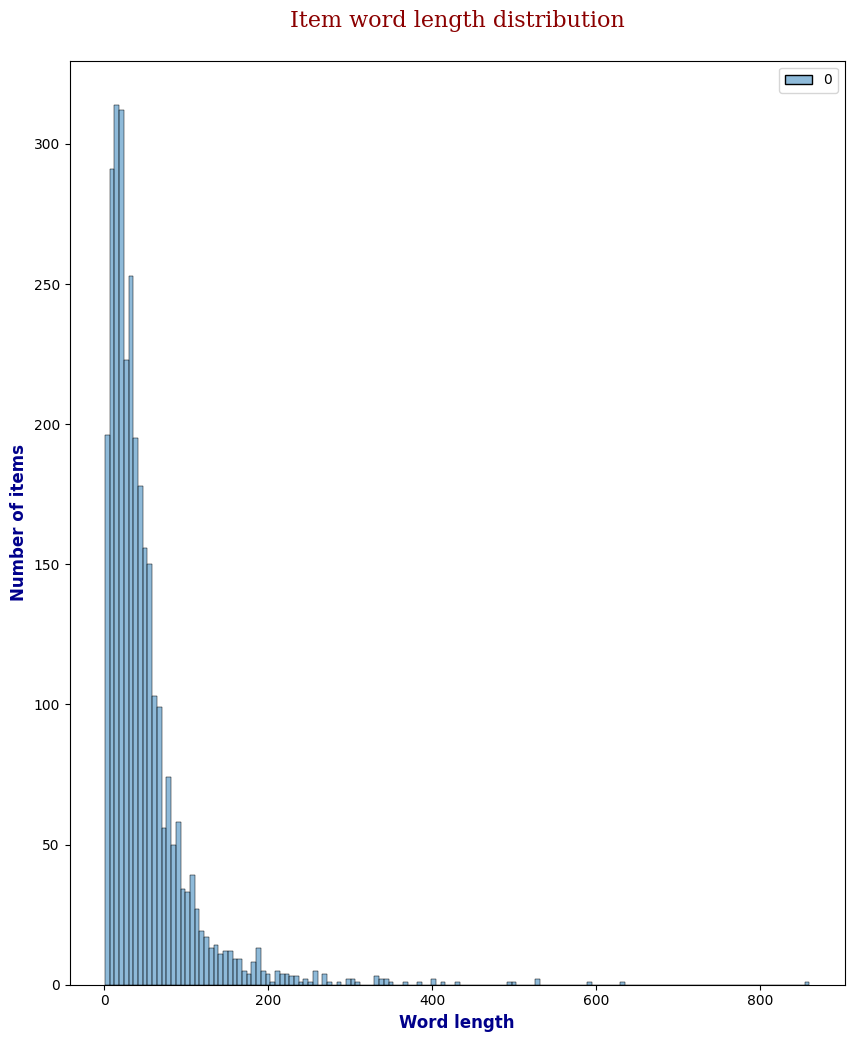

In [862]:
plt.figure(figsize = (10,12))
ax  =sn.histplot(data = item_words_df)
ax.set_title("Item word length distribution\n", fontdict = title_font)
ax.set_xlabel('Word length', fontdict = label_font)
ax.set_ylabel('Number of items', fontdict = label_font)
plt.show()


#OBSERVATION: Most of the items are of less than 200 word length.

### 3.2 Data preprocessing

In [863]:
# creating numpy array for item text content
item_text_array = item_df2['text_content'].to_numpy()
item_text_array[0]

'Ethereum, a Virtual Currency, Enables Transactions That Rival Bitcoin\'sAll of this work is still very early. The first full public version of the Ethereum software was recently released, and the system could face some of the same technical and legal problems that have tarnished Bitcoin. Many Bitcoin advocates say Ethereum will face more security problems than Bitcoin because of the greater complexity of the software. Thus far, Ethereum has faced much less testing, and many fewer attacks, than Bitcoin. The novel design of Ethereum may also invite intense scrutiny by authorities given that potentially fraudulent contracts, like the Ponzi schemes, can be written directly into the Ethereum system. But the sophisticated capabilities of the system have made it fascinating to some executives in corporate America. IBM said last year that it was experimenting with Ethereum as a way to control real world objects in the so-called Internet of things. Microsoft has been working on several project

In [864]:
#Generate Words from Keywords Array by Splitting

text_word_list= []

for item in item_text_array:
    item_words = item.split()
    text_word_list.append(item_words)
text_word_list[0]

['Ethereum,',
 'a',
 'Virtual',
 'Currency,',
 'Enables',
 'Transactions',
 'That',
 'Rival',
 "Bitcoin'sAll",
 'of',
 'this',
 'work',
 'is',
 'still',
 'very',
 'early.',
 'The',
 'first',
 'full',
 'public',
 'version',
 'of',
 'the',
 'Ethereum',
 'software',
 'was',
 'recently',
 'released,',
 'and',
 'the',
 'system',
 'could',
 'face',
 'some',
 'of',
 'the',
 'same',
 'technical',
 'and',
 'legal',
 'problems',
 'that',
 'have',
 'tarnished',
 'Bitcoin.',
 'Many',
 'Bitcoin',
 'advocates',
 'say',
 'Ethereum',
 'will',
 'face',
 'more',
 'security',
 'problems',
 'than',
 'Bitcoin',
 'because',
 'of',
 'the',
 'greater',
 'complexity',
 'of',
 'the',
 'software.',
 'Thus',
 'far,',
 'Ethereum',
 'has',
 'faced',
 'much',
 'less',
 'testing,',
 'and',
 'many',
 'fewer',
 'attacks,',
 'than',
 'Bitcoin.',
 'The',
 'novel',
 'design',
 'of',
 'Ethereum',
 'may',
 'also',
 'invite',
 'intense',
 'scrutiny',
 'by',
 'authorities',
 'given',
 'that',
 'potentially',
 'fraudulent',
 '

In [865]:
number_words = 0
for word in text_word_list:
    number_words = number_words + len(word)

print(f"The corpus contains {number_words} words in total ")

The corpus contains 2774633 words in total 


In [866]:
#!pip install gensim

In [867]:
#create dictionary of words

from gensim.corpora.dictionary import Dictionary

In [868]:
dictionary = Dictionary(text_word_list) 

In [869]:
print(f"The corpus contains {len(dictionary)} unique words")

The corpus contains 185185 unique words


In [870]:
# create BOW for all text items
corpus = [dictionary.doc2bow(doc) for doc in text_word_list] 

# look at first doc
corpus[0]

[(0, 1),
 (1, 1),
 (2, 2),
 (3, 1),
 (4, 1),
 (5, 2),
 (6, 1),
 (7, 1),
 (8, 1),
 (9, 1),
 (10, 1),
 (11, 1),
 (12, 1),
 (13, 1),
 (14, 9),
 (15, 1),
 (16, 1),
 (17, 1),
 (18, 1),
 (19, 1),
 (20, 1),
 (21, 1),
 (22, 1),
 (23, 1),
 (24, 1),
 (25, 1),
 (26, 1),
 (27, 5),
 (28, 1),
 (29, 6),
 (30, 3),
 (31, 1),
 (32, 1),
 (33, 1),
 (34, 1),
 (35, 1),
 (36, 1),
 (37, 1),
 (38, 1),
 (39, 1),
 (40, 2),
 (41, 1),
 (42, 1),
 (43, 1),
 (44, 1),
 (45, 1),
 (46, 1),
 (47, 7),
 (48, 1),
 (49, 1),
 (50, 24),
 (51, 1),
 (52, 1),
 (53, 2),
 (54, 1),
 (55, 1),
 (56, 1),
 (57, 1),
 (58, 1),
 (59, 1),
 (60, 1),
 (61, 1),
 (62, 1),
 (63, 1),
 (64, 1),
 (65, 1),
 (66, 1),
 (67, 1),
 (68, 1),
 (69, 2),
 (70, 1),
 (71, 1),
 (72, 1),
 (73, 1),
 (74, 3),
 (75, 1),
 (76, 1),
 (77, 1),
 (78, 1),
 (79, 1),
 (80, 1),
 (81, 1),
 (82, 7),
 (83, 1),
 (84, 1),
 (85, 1),
 (86, 1),
 (87, 1),
 (88, 1),
 (89, 1),
 (90, 1),
 (91, 1),
 (92, 1),
 (93, 1),
 (94, 1),
 (95, 1),
 (96, 1),
 (97, 1),
 (98, 2),
 (99, 1),
 (100, 1)

In [871]:
len(corpus)

## all 3057's token's TF-IDFs representation is ready.

3057

### 3.2 TF-IDF Model

- TF = Term frequency -> count/no.
- IDF = Inverse doc freq. -> log(N/n)

In [872]:
from gensim.models.tfidfmodel import TfidfModel

In [873]:
#create TF-IDF model
tfidf = TfidfModel(corpus)

In [874]:
# look at the text rep(importance of all words) for first item
tfidf[corpus[0]]

[(0, np.float64(0.012669890001350277)),
 (1, np.float64(0.017434146562231887)),
 (2, np.float64(0.07679053377650427)),
 (3, np.float64(0.043878837705176775)),
 (4, np.float64(0.043878837705176775)),
 (5, np.float64(0.041298993190795545)),
 (6, np.float64(0.04145231896307899)),
 (7, np.float64(0.024496864246418296)),
 (8, np.float64(0.038395266888252136)),
 (9, np.float64(0.03730415777478692)),
 (10, np.float64(0.039730676516884694)),
 (11, np.float64(0.03424710569996006)),
 (12, np.float64(0.03730415777478692)),
 (13, np.float64(0.0035506070541781584)),
 (14, np.float64(0.027961672244999198)),
 (15, np.float64(0.011334480372717712)),
 (16, np.float64(0.025245907027472436)),
 (17, np.float64(0.027102038989097334)),
 (18, np.float64(0.018715721960601752)),
 (19, np.float64(0.04145231896307899)),
 (20, np.float64(0.04145231896307899)),
 (21, np.float64(0.01625950324898516)),
 (22, np.float64(0.04145231896307899)),
 (23, np.float64(0.0038076176651378876)),
 (24, np.float64(0.02952855773119

### 3.4 Similarity Matrix

In [875]:
from gensim.similarities import MatrixSimilarity

In [876]:
sim_mat = MatrixSimilarity(tfidf[corpus], num_features=len(dictionary))
# look at first item's matrix
sim_mat[corpus[0]]

array([0.5445268 , 0.5445268 , 0.0840217 , ..., 0.1576289 , 0.16591395,
       0.06400673], dtype=float32)

In [877]:
len(sim_mat[corpus[0]])

# similarity of first item to all the other items 

3057

In [878]:
sim_mat.num_features

185185

### 3.5 Similar items Recommendations for an item

#### predictions

In [879]:
item_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3057 entries, 0 to 3121
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   interaction_type   3057 non-null   object
 1   item_id            3057 non-null   int64 
 2   producer_id        3057 non-null   int64 
 3   producer_location  669 non-null    object
 4   producer_country   669 non-null    object
 5   item_type          3057 non-null   object
 6   title              3057 non-null   object
 7   text_description   3057 non-null   object
 8   language           3057 non-null   object
 9   item_no            3057 non-null   int64 
dtypes: int64(3), object(7)
memory usage: 262.7+ KB


In [880]:
### item_no 200 (item_id 3068975614432538771) 
#pd.set_option('max_colwidth', None)
item_id = 200
the_item = item_df2[item_df2['item_no']==item_id][ ['text_content']]
the_item

,text_content
204,Microsoft Strikes Partnership With Banks on Bl...


In [881]:
item_words_list = the_item['text_content'].iloc[0].split()
item_words_list

['Microsoft',
 'Strikes',
 'Partnership',
 'With',
 'Banks',
 'on',
 'Blockchain',
 'TechMicrosoft',
 'Inc.',
 'has',
 'pulled',
 'ahead',
 'of',
 'Alphabet',
 "Inc.'s",
 'Google,',
 'International',
 'Business',
 'Machines',
 'Corp.,',
 'and',
 'Amazon.com',
 'Inc.',
 'in',
 'the',
 'race',
 'for',
 'supremacy',
 'in',
 'operating',
 'other',
 "companies'",
 'blockchains.',
 'Microsoft',
 'and',
 'R3,',
 'a',
 'consortium',
 'of',
 '43',
 'financial',
 'institutions,',
 'have',
 'formed',
 'a',
 'strategic',
 'partnership',
 'to',
 'accelerate',
 'the',
 'use',
 'of',
 'the',
 'blockchain',
 'technologies.',
 'Microsoft',
 'Chief',
 'Executive',
 'Officer',
 'Satya',
 'Nadella',
 'announced',
 'the',
 'deal',
 'at',
 'the',
 "company's",
 'Envision',
 'conference',
 'Monday.',
 'Blockchains',
 '--',
 'basically',
 'online',
 'ledgers',
 'for',
 'recording',
 'transactions',
 '--',
 'first',
 'gained',
 'popularity',
 'with',
 'the',
 'digital',
 'currency',
 'bitcoin.',
 'But',
 'now'

In [882]:
query_doc = item_words_list 

# bow for query_doc
bow_query = dictionary.doc2bow(query_doc)
# get TFIDF rep for query_doc
tfidf_item_query = tfidf [bow_query]
tfidf_item_query[0:10]

[(5, np.float64(0.037341177614334274)),
 (31, np.float64(0.040417356070536356)),
 (32, np.float64(0.06193019044367915)),
 (38, np.float64(0.026132143463921145)),
 (56, np.float64(0.0657901371254843)),
 (57, np.float64(0.0657901371254843)),
 (62, np.float64(0.07044069016467512)),
 (75, np.float64(0.06745836029397084)),
 (78, np.float64(0.179476673614596)),
 (79, np.float64(0.07630352352691241))]

In [883]:
# Similarity array for this item
prediction_item_query = sim_mat[tfidf_item_query] 
prediction_item_query_df = pd.DataFrame(prediction_item_query, index = item_df2.item_no, columns =  ['similarity_score']).sort_values(by = 'similarity_score', ascending = False)
prediction_item_query_df.head()

,similarity_score
item_no,
200,1.000000
2712,0.300519
175,0.193961
2408,0.190866
261,0.173524


#### Filter and recommend  

- Filter out non-English and pulled out contents or the item itself

In [884]:
filter_and_recommend(prediction_item_query_df , is_collaborative= False)

,title,text_description
1,Blockchain startup R3 cuts fund-raising target...,NEW YORK Blockchain company R3 CEV has reduced...
2,R3 Blockchain Consortium Partners with Microso...,Microsoft today announced a strategic partners...
3,Blockchain Will Be Used By 15% of Big Banks By...,Trying to transfer cash to a friend's bank acc...
4,9 Big Takeaways from R3's New Distributed Ledg...,Following a flurry of announcements that mostl...
5,Brazil's Bank Itaú Joins R3 Blockchain Consort...,São Paulo-based Itaú Unibanco has become the f...
6,Brazil's Banco Bradesco Joins R3 Consortium - ...,A major Brazilian banking institution has beco...
7,Decentralizing IoT networks through blockchain,Imagine a washer that autonomously contacts su...
8,"IBM Wants to ""Evolve the Internet"" With Blockc...",The Aite Group projects the blockchain market ...
9,Banks' Privacy Concerns Shaping Blockchain Ven...,One of the ostensible selling points of blockc...
10,Blockchain Huge Potential For The Insurance In...,The total worth of Bitcoin today in the blockc...


### 3.6 Recommendations for a user

In [886]:
def consumer_CB_predictions(consumer_no):
    user_predictions = {}
    # this is a dict of all the items recommended on the basis of each item consumed by the consumer. 
    # the recommended items will have combined score from all individual predictions
    
    user_items  = consumer_df2[(consumer_df2['consumer_no'] == consumer_no)]['item_no'].unique()
    if len(user_items) ==0 :
        return user_precisions

    for item in user_items:
        word_list = item_df2[item_df2['item_no'] == item]['text_content'].iloc[0].split()
        bow_item = dictionary.doc2bow(word_list)
        tfidf_item = tfidf [bow_item]
        prediction_items = sim_mat[tfidf_item] 
        prediction_items_df = pd.DataFrame(prediction_items, index = item_df2.item_no, columns =  ['similarity_score']).sort_values(by = 'similarity_score', ascending = False)[:100]
        #print(prediction_items_df)
        for new_pred in prediction_items_df.index:
            #print(new_pred)
            #print(prediction_items_df.loc[new_pred])
            if(new_pred in user_predictions.keys()):
                user_predictions[new_pred] =  user_predictions[new_pred] + prediction_items_df.loc[new_pred]['similarity_score']
            else:
                user_predictions[new_pred] = prediction_items_df.loc[new_pred]['similarity_score']
            
    for item in user_items:
          user_predictions[item] = -1  # exclude all items which are already consumed before returning

    # sort the dictionary on basis of similarity score and return top K items
    final_predictions =  pd.DataFrame(data = user_predictions.values(), index = user_predictions.keys(), columns = ['similarity_score'],  ).sort_values(by = 'similarity_score' , ascending= False )
    final_predictions.index.name = 'item_no'
    #final_predictions= final_predictions.sort_values(by = 'similarity_score' , ascending= False )[:K]
    return final_predictions

In [887]:
consumer_no =67
K =10

In [888]:
consumer_predictions = consumer_CB_predictions(consumer_no)
consumer_predictions

,similarity_score
item_no,
1343,16.718954
2960,15.443277
1041,15.077695
2294,15.067910
2820,14.820799
...,...
529,-1.000000
2800,-1.000000
951,-1.000000


In [889]:
filter_and_recommend(consumer_predictions, consumer_no)

,title,text_description
1,12 Agile principles,This chapter from Learning Agile lays out the ...
2,State of the Digital Nation 2016,"In 2013, we explored the state and future of t..."
3,So long MVP. Hello Minimum Loveable Product.,How to Build a Minimum Loveable Product Learn ...
6,Machine Learning for Designers,Les machines de l'île (source: By Traaf on Fli...
22,A Single App That'll Wrangle Your Millions of ...,"Way back in the Mesozoic Era of the Internet, ..."
23,A Single App That'll Wrangle Your Millions of ...,"Way back in the Mesozoic Era of the Internet, ..."
27,Being A Developer After 40 - Free Code Camp,Being A Developer After 40 (This is the talk I...
30,Bots won't replace apps. Better apps will repl...,"Lately, everyone's talking about ""conversation..."
48,Leveling Up Your JavaScript -,JavaScript is one of those languages that can ...
49,This year's Founders' Letter,"Every year, Larry and Sergey write a Founders'..."


### 3.7 Evaluation

##### precision@K

In [893]:
# calc the precision@k for a specific user
precision =0
recall = 0
# for all items consumed by user, we'll find the predictions for user, at the end we'll avg it to ger the precision@K and recal
actual_values  = consumer_df2[(consumer_df2['consumer_no'] == consumer_no)]['item_no'].unique()
predictions_df  = consumer_CB_predictions(consumer_no)
prediction_items_df = pd.DataFrame(predictions_df, index = item_df2.item_no, columns =  ['similarity_score']).sort_values(by = 'similarity_score', ascending = False)[1:K+1]
predicted_items = set(prediction_items_df.index)
if(len(actual_values) >0 ):
    hits = len(set(actual_values).intersection(set(predicted_items)))
    precision = hits/K
    recall = hits/len(set(actual_values))
    #precision.append(precision_for_item)
    #recall.append(recall_for_item)  
print(f" The precision@K  for Content based recommender  for this user is {np.mean(precision)}")
print(f" The recall@k for Content based recommender is {np.mean(recall)}")

 The precision@K  for Content based recommender  for this user is 0.0
 The recall@k for Content based recommender is 0.0


In [894]:
print(f" The precision@K  for Content based recommender  for this user is {np.mean(precision)}")

 The precision@K  for Content based recommender  for this user is 0.0


##### recall@K

In [895]:
print(f" The recall@k for Content based recommender is {np.mean(recall)}")

 The recall@k for Content based recommender is 0.0


##### global@K

In [896]:
set((predictions_df.index)[:K])

{1041, 1343, 1621, 1894, 2294, 2515, 2695, 2820, 2952, 2960}

In [ ]:
"""global_precision = 0
for user_no in range(n_users):
    actual_values  = consumer_df2[(consumer_df2['consumer_no'] == consumer_no)]['item_no'].unique()
    predictions_df  = consumer_CB_predictions(consumer_no)
    #prediction_items_df = pd.DataFrame(prediction_items, index = item_df2.item_no, columns =  ['similarity_score']).sort_values(by = 'similarity_score', ascending = False)[1:K+1]
    predicted_items = set((predictions_df.index)[:K])
    if(len(actual_values) >0 ):
        hits = len(set(actual_values).intersection(set(predicted_items)))
        precision = hits/K
        global_precision = global_precision + precision
    
print(f" The global@K  for Content based recommender is {global_precision}")"""

In [158]:
global_precision = 0

# keep a dictionary of items for which we have already got the similar items, to avoid the repeated calls for each item for different users.
already_predicted  = {}
#print("I am here")
for user_no in range(n_users):
    user_precisions =[]
    user_items  = consumer_df2[(consumer_df2['consumer_no'] == user_no)]['item_no'].unique()
    if(len(user_items)>1) :    ## skip this user for where a user has consumed only one item, so to compare the predicted results we don't have actual values set.
        for item in user_items:
            actual_values = set(user_items)-{item}
            if not actual_values:
                continue
                
            if(item in already_predicted.keys()):
                #print(f" {item} item already got similar items")
                predicted_items = already_predicted[item]
            else:
                #print(f"find similar items for item {item}")
                word_list = item_df2[item_df2['item_no'] == item]['text_content'].iloc[0].split()
                bow_item = dictionary.doc2bow(word_list)
                tfidf_item = tfidf [bow_item]
                prediction_items = sim_mat[tfidf_item] 
                prediction_items_df = pd.DataFrame(prediction_items, index = item_df2.item_no, columns =  ['similarity_score']).sort_values(by = 'similarity_score', ascending = False)[1:K+1]
                predicted_items = prediction_items_df.reset_index().iloc[:,0]
                already_predicted[item] = predicted_items
                    
            hits = len(actual_values.intersection(set(predicted_items)))
            precision_for_item = hits/K
            user_precisions.append(precision_for_item)
            #print(user_precisions)
            
        avg_user_precision = np.mean(user_precisions)
        print("user_precision" , avg_user_precision)
        global_precision = global_precision + avg_user_precision
        print("global_precision", global_precision)

print(f" The global@K  for Content based recommender is {global_precision}")

user_precision 0.08153846153846152
global_precision 0.08153846153846152
user_precision 0.3276234567901235
global_precision 0.409161918328585
user_precision 0.045535714285714284
global_precision 0.4546976326142993
user_precision 0.025
global_precision 0.4796976326142993
user_precision 0.17380952380952383
global_precision 0.6535071564238232
user_precision 0.016363636363636365
global_precision 0.6698707927874595
user_precision 0.4466181061394381
global_precision 1.1164888989268977
user_precision 0.11277777777777777
global_precision 1.2292666767046756
user_precision 0.10776699029126213
global_precision 1.3370336669959377
user_precision 0.04423076923076923
global_precision 1.381264436226707
user_precision 0.02972972972972973
global_precision 1.4109941659564367
user_precision 0.01666666666666667
global_precision 1.4276608326231033
user_precision 0.13287671232876713
global_precision 1.5605375449518704
user_precision 0.20481481481481484
global_precision 1.7653523597666851
user_precision 0.0106

In [400]:
print(f" The global@K  for Content based recommender is {global_precision/n_users}")

 The global@K  for Content based recommender is 0.020160818521352847


## 4. ALS Recommendation

In [ ]:
#!pip install --upgrade setuptools wheel

In [ ]:
#!pip install implicit

### 4.1 Sparse matrix

In [897]:
from scipy.sparse import csr_matrix
import implicit
import itertools
import time

In [898]:
consumer_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72312 entries, 0 to 72311
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   consumer_no  72312 non-null  int64
 1   item_no      72312 non-null  int64
 2   rating       72312 non-null  int64
dtypes: int64(3)
memory usage: 1.7 MB


In [899]:
alpha = 60

In [900]:
consumer_df.shape[0]

72312

In [901]:
sparse_consumer_item = csr_matrix( ([alpha]*consumer_df.shape[0], (consumer_df2.consumer_no , consumer_df2.item_no) ))
sparse_consumer_item

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 40710 stored elements and shape (1895, 3057)>

In [902]:
csr_consumer_array = sparse_consumer_item.toarray()

In [903]:
sparse_item_consumer = sparse_consumer_item.T.tocsr()
sparse_item_consumer.shape

(3057, 1895)

### 4.2 Split test train data

In [904]:
from implicit.evaluation import train_test_split

In [905]:
train, test = train_test_split(sparse_item_consumer, train_percentage=0.8)

In [906]:
print(train.shape, test.shape)

(3057, 1895) (3057, 1895)


### 4.3 ALS model

#### Modelling

In [907]:
model1 = implicit.als.AlternatingLeastSquares(factors=100, regularization=0.1, iterations=200, calculate_training_loss=False, random_state =40)

In [908]:
model1.fit(train)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [00:03<00:00, 50.59it/s]


#### Prediction for a user

In [909]:
consumer_no = 67

In [910]:
sparse_item_consumer.shape[0]

3057

In [911]:
als_preds = model1.recommend(consumer_no, sparse_item_consumer[consumer_no], N= n_items)
als_preds

(array([603,  98,  61, ...,   0,   0,   0], dtype=int32),
 array([0.51983756, 0.4733968 , 0.46098596, ..., 0.        , 0.        ,
        0.        ], dtype=float32))

In [912]:
als_preds_df = pd.DataFrame(als_preds).T
als_preds_df.columns = ['item_no', 'similarity_score']
als_preds_df.item_no =  als_preds_df.item_no.apply(lambda x:int(x))
als_preds_df.head()

,item_no,similarity_score
0,603,0.519838
1,98,0.473397
2,61,0.460986
3,168,0.443232
4,21,0.412447


#### Filter and Recommend

In [913]:
# Top ten item recommendations based on the above predictiosn
filter_and_recommend(als_preds_df, consumer_no)

,title,text_description
1,The Future of Pen: Windows Ink,What a day at //build 2016! We're very proud o...
2,5 open-source alternatives to Slack,"Slack, the team communication app, went down e..."
3,A programming language for living cells,MIT biological engineers have devised a progra...
5,Growing Global Electricity Consumption Is Not ...,"Over the years, there has been a lot of focus ..."
6,Saving the World Through Crypto: The Humanitar...,The Humanitarian Blockchain is taking on the w...
8,Google DeepMind Is Now Analysing Magic And Hea...,"With retro games and Go well-conquered , where..."
9,Google's AI DeepMind Turns its Gaze to Hearths...,What will it be used for next? Researchers at ...
10,Picture a Better You: How Google Calendar Uses...,Picture a Better You: How Google Calendar Uses...
13,"Ethereum, a Virtual Currency, Enables Transact...",All of this work is still very early. The firs...
14,"When not to quit, according to the founder of ...",Getty / Michael Kovac Note: This is an excerpt...


#### Evaluation

In [914]:
actual_ratings = consumer_df2[consumer_df2['consumer_no'] == consumer_no]['item_no'].unique()
print(len(actual_ratings))
#actual_ratings


185


In [915]:
top_recommend_k = als_preds_df[:K]['item_no']

##### recall@K

In [916]:
recall_at_k = len(set(top_recommend_k) & set(actual_ratings))/len(actual_ratings)
print(f" The recall@k for ALS1 recommender is {recall_at_k}" )

 The recall@k for ALS1 recommender is 0.005405405405405406


##### precision@K

In [917]:
precision_at_k = len(set(top_recommend_k) & set(actual_ratings))/K
print(f" The precision@K for ALS1 recommender  recommender is {precision_at_k}")


 The precision@K for ALS1 recommender  recommender is 0.1


##### global@K

In [918]:
als_at_k = 0
user_nos = [u for u in range(n_users)]
all_users_recommendations = model1.recommend(user_nos,sparse_item_consumer[user_nos] ,K)
for u in user_nos:
    acutal_ratings = consumer_df2[consumer_df2['consumer_no'] == u]['item_no']
    top_k_cf_preds = all_users_recommendations[0][u]   ## first vector contains ids and 2nd contains the scores
    precision = len(set(top_k_cf_preds) & set(acutal_ratings))/K
    #print(len(set(top_k_preds) & set(acutal_ratings)), precision)
    als_at_k  = als_at_k+ precision

print(f" The global@k for ALS 1 recommender is {als_at_k/n_users}")

 The global@k for ALS 1 recommender is 0.004010554089709757


### 4.4 Hyperparameter tuning

In [919]:
def calc_precision_at_k(model, train_matrix, test_data, K=10):
    precisions = []

    for user in range(n_users):
        test_items = test_data[user]
        if len(test_items) == 0:
            continue

        recs = model.recommend(
            userid=user,
            user_items=train_matrix[user],
            N=K,
            filter_already_liked_items=True
        )
        rec_items = recs[0]

        hits = len(set(rec_items).intersection(test_items))
        precisions.append(hits / K)

    return np.mean(precisions)

In [920]:
def tune_als(train_matrix, test_dict, K=10):

    param_grid = {
        "rank": [32, 64, 128],
        "alpha": [16, 32, 64],
        "reg": [0.01, 0.05, 0.1],
        "iterations": [10, 20]
    }

    best_score = -1
    best_params = None
    best_model = None

    for rank, alpha, reg, iters in itertools.product(
        param_grid["rank"],
        param_grid["alpha"],
        param_grid["reg"],
        param_grid["iterations"]
    ):
        start = time.time()
        print(f"\nTesting rank={rank}, alpha={alpha}, reg={reg}, iter={iters}")

        model = implicit.als.AlternatingLeastSquares(
            factors=rank,
            regularization=reg,
            iterations=iters
        )

        # IMPORTANT: train with confidence weights
        model.fit(train_matrix * alpha)

        score = calc_precision_at_k(model, train_matrix, test_dict, K=K)

        print(f"Precision@{K}: {score:.4f} | time={time.time()-start:.1f}s")

        if score > best_score:
            best_score = score
            best_params = (rank, alpha, reg, iters)
            best_model = model

    print("\n Best ALS Model with its paramters is:")
    print(f"Rank={best_params[0]}, Alpha={best_params[1]}, Reg={best_params[2]}, Iter={best_params[3]}")
    print(f"Precision@{K}: {best_score:.4f}")

    return best_model, best_params, best_score

In [921]:
x = test.toarray()
x.shape

(3057, 1895)

In [922]:
model, params, score = tune_als(train, test.toarray(), K)


Testing rank=32, alpha=16, reg=0.01, iter=10


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 61.87it/s]


Precision@10: 0.0215 | time=0.8s

Testing rank=32, alpha=16, reg=0.01, iter=20


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 68.13it/s]


Precision@10: 0.0131 | time=0.9s

Testing rank=32, alpha=16, reg=0.05, iter=10


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 68.73it/s]


Precision@10: 0.0165 | time=0.7s

Testing rank=32, alpha=16, reg=0.05, iter=20


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 72.26it/s]


Precision@10: 0.0149 | time=1.0s

Testing rank=32, alpha=16, reg=0.1, iter=10


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 75.34it/s]


Precision@10: 0.0182 | time=0.7s

Testing rank=32, alpha=16, reg=0.1, iter=20


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 76.75it/s]


Precision@10: 0.0168 | time=0.9s

Testing rank=32, alpha=32, reg=0.01, iter=10


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 70.89it/s]


Precision@10: 0.0265 | time=0.8s

Testing rank=32, alpha=32, reg=0.01, iter=20


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 70.90it/s]


Precision@10: 0.0340 | time=1.0s

Testing rank=32, alpha=32, reg=0.05, iter=10


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 70.08it/s]


Precision@10: 0.0285 | time=0.9s

Testing rank=32, alpha=32, reg=0.05, iter=20


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 78.01it/s]


Precision@10: 0.0150 | time=0.9s

Testing rank=32, alpha=32, reg=0.1, iter=10


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 72.97it/s]


Precision@10: 0.0170 | time=0.7s

Testing rank=32, alpha=32, reg=0.1, iter=20


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 73.96it/s]


Precision@10: 0.0106 | time=1.0s

Testing rank=32, alpha=64, reg=0.01, iter=10


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 75.47it/s]


Precision@10: 0.0180 | time=0.8s

Testing rank=32, alpha=64, reg=0.01, iter=20


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 77.69it/s]


Precision@10: 0.0179 | time=0.8s

Testing rank=32, alpha=64, reg=0.05, iter=10


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 67.67it/s]


Precision@10: 0.0165 | time=0.8s

Testing rank=32, alpha=64, reg=0.05, iter=20


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 73.48it/s]


Precision@10: 0.0174 | time=0.9s

Testing rank=32, alpha=64, reg=0.1, iter=10


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 65.04it/s]


Precision@10: 0.0198 | time=0.8s

Testing rank=32, alpha=64, reg=0.1, iter=20


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 74.17it/s]


Precision@10: 0.0153 | time=0.8s

Testing rank=64, alpha=16, reg=0.01, iter=10


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 53.48it/s]


Precision@10: 0.0149 | time=0.8s

Testing rank=64, alpha=16, reg=0.01, iter=20


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 64.05it/s]


Precision@10: 0.0170 | time=0.9s

Testing rank=64, alpha=16, reg=0.05, iter=10


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 57.98it/s]


Precision@10: 0.0200 | time=0.8s

Testing rank=64, alpha=16, reg=0.05, iter=20


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 72.77it/s]


Precision@10: 0.0170 | time=1.0s

Testing rank=64, alpha=16, reg=0.1, iter=10


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 63.08it/s]


Precision@10: 0.0119 | time=0.9s

Testing rank=64, alpha=16, reg=0.1, iter=20


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 68.62it/s]


Precision@10: 0.0106 | time=0.9s

Testing rank=64, alpha=32, reg=0.01, iter=10


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 70.24it/s]


Precision@10: 0.0201 | time=0.9s

Testing rank=64, alpha=32, reg=0.01, iter=20


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 70.21it/s]


Precision@10: 0.0162 | time=0.9s

Testing rank=64, alpha=32, reg=0.05, iter=10


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 76.15it/s]


Precision@10: 0.0349 | time=0.9s

Testing rank=64, alpha=32, reg=0.05, iter=20


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 78.23it/s]


Precision@10: 0.0106 | time=1.0s

Testing rank=64, alpha=32, reg=0.1, iter=10


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 72.09it/s]


Precision@10: 0.0097 | time=0.8s

Testing rank=64, alpha=32, reg=0.1, iter=20


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 67.28it/s]


Precision@10: 0.0131 | time=1.0s

Testing rank=64, alpha=64, reg=0.01, iter=10


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 46.74it/s]


Precision@10: 0.0183 | time=1.0s

Testing rank=64, alpha=64, reg=0.01, iter=20


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 68.79it/s]


Precision@10: 0.0198 | time=1.0s

Testing rank=64, alpha=64, reg=0.05, iter=10


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 62.86it/s]


Precision@10: 0.0317 | time=1.2s

Testing rank=64, alpha=64, reg=0.05, iter=20


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 69.13it/s]


Precision@10: 0.0123 | time=0.9s

Testing rank=64, alpha=64, reg=0.1, iter=10


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 56.72it/s]


Precision@10: 0.0241 | time=1.1s

Testing rank=64, alpha=64, reg=0.1, iter=20


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 69.78it/s]


Precision@10: 0.0129 | time=1.0s

Testing rank=128, alpha=16, reg=0.01, iter=10


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 55.03it/s]


Precision@10: 0.0139 | time=0.9s

Testing rank=128, alpha=16, reg=0.01, iter=20


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 53.06it/s]


Precision@10: 0.0172 | time=1.1s

Testing rank=128, alpha=16, reg=0.05, iter=10


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 58.05it/s]


Precision@10: 0.0362 | time=1.0s

Testing rank=128, alpha=16, reg=0.05, iter=20


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 52.22it/s]


Precision@10: 0.0151 | time=1.1s

Testing rank=128, alpha=16, reg=0.1, iter=10


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 45.84it/s]


Precision@10: 0.0125 | time=1.0s

Testing rank=128, alpha=16, reg=0.1, iter=20


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 50.60it/s]


Precision@10: 0.0135 | time=1.3s

Testing rank=128, alpha=32, reg=0.01, iter=10


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 37.58it/s]


Precision@10: 0.0222 | time=1.0s

Testing rank=128, alpha=32, reg=0.01, iter=20


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 51.71it/s]


Precision@10: 0.0266 | time=1.1s

Testing rank=128, alpha=32, reg=0.05, iter=10


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 45.03it/s]


Precision@10: 0.0274 | time=1.1s

Testing rank=128, alpha=32, reg=0.05, iter=20


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 43.65it/s]


Precision@10: 0.0135 | time=1.3s

Testing rank=128, alpha=32, reg=0.1, iter=10


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 50.47it/s]


Precision@10: 0.0172 | time=1.1s

Testing rank=128, alpha=32, reg=0.1, iter=20


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 50.57it/s]


Precision@10: 0.0277 | time=1.1s

Testing rank=128, alpha=64, reg=0.01, iter=10


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 53.03it/s]


Precision@10: 0.0140 | time=0.8s

Testing rank=128, alpha=64, reg=0.01, iter=20


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 54.70it/s]


Precision@10: 0.0195 | time=1.0s

Testing rank=128, alpha=64, reg=0.05, iter=10


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 52.26it/s]


Precision@10: 0.0480 | time=1.0s

Testing rank=128, alpha=64, reg=0.05, iter=20


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 53.92it/s]


Precision@10: 0.0348 | time=1.1s

Testing rank=128, alpha=64, reg=0.1, iter=10


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 53.44it/s]


Precision@10: 0.0329 | time=1.1s

Testing rank=128, alpha=64, reg=0.1, iter=20


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 41.14it/s]


Precision@10: 0.0108 | time=1.1s

 Best ALS Model with its paramters is:
Rank=128, Alpha=64, Reg=0.05, Iter=10
Precision@10: 0.0480


#### Prediction for a user

In [924]:
consumer_no =1

In [925]:
als_preds2 = model.recommend(consumer_no, sparse_item_consumer[consumer_no], N= n_items)
als_preds2

(array([1017,  945,  510, ...,    0,    0,    0], dtype=int32),
 array([0.45023245, 0.38436744, 0.34763336, ..., 0.        , 0.        ,
        0.        ], dtype=float32))

In [926]:
als_preds2 = pd.DataFrame(als_preds2).T
als_preds2.columns = ['item_no', 'similarity_score']
als_preds2.item_no =  als_preds2.item_no.apply(lambda x:int(x))
als_preds2.head()

,item_no,similarity_score
0,1017,0.450232
1,945,0.384367
2,510,0.347633
3,174,0.321159
4,495,0.304319


#### Filter and recommend  

- Filter non-English and pulled out contents or items the consumer has already watched

In [927]:
# Top ten item recommendations based on the above predictiosn
filter_and_recommend(als_preds2, consumer_no)

,title,text_description
1,UK shows off prototype of digital iPhone drivi...,It looks like drivers in the UK could soon be ...
2,An Introduction to Elasticsearch Aggregations,The aggregations feature set is one of the mos...
3,Free online Game AI Classes - Apex Game Tools,Would you like us to create free online Game A...
4,Search API,This module provides a framework for easily cr...
5,OpenAI,We're releasing the public beta of OpenAI Gym ...
7,Drupal 8 Module of the Week: simpleSAMLphp Aut...,"Each day, more Drupal 7 modules are being migr..."
8,"Proof of Individuality, the New-Age Security o...",Proof of Individuality protocol is designed to...
12,The Top 10 Most Common Mistakes That Node.js D...,Since the moment Node.js was unveiled to the w...
14,Don't take my money: Why mobile payments haven...,A buck says you won't buy your next tank of ga...
17,Startup aims to use machine learning to make m...,One of the most important features of mobile p...


#### Evaluation

In [928]:
K=10

##### precision@K

In [929]:
actual_ratings = consumer_df2[consumer_df2['consumer_no'] == consumer_no]['item_no']
print(actual_ratings.nunique())
#actual_ratings


648


In [930]:
top_recommend_k = als_preds2[:K]['item_no']

In [931]:
precision_at_k = len(set(top_recommend_k) & set(actual_ratings))/K
print(f" The precision@K for ALS2 recommender is {precision_at_k}")


 The precision@K for ALS2 recommender is 0.2


##### recall@K

In [932]:
recall_at_k = len(set(top_recommend_k) & set(actual_ratings))/actual_ratings.nunique()
print(f" The recall@k for ALS2 recommender is {recall_at_k}")
#actual_ratings

 The recall@k for ALS2 recommender is 0.0030864197530864196


##### global@K

In [933]:
als2_at_k = 0
user_nos = [u for u in range(n_users)]
all_users_recommendations = model2.recommend(user_nos,sparse_item_consumer[user_nos] ,K)
for u in user_nos:
    acutal_ratings = consumer_df2[consumer_df2['consumer_no'] == u]['item_no']
    top_k_cf_preds = all_users_recommendations[0][u]   ## first vector contains ids and 2nd contains the scores
    precision = len(set(top_k_cf_preds) & set(acutal_ratings))/K
    #print(len(set(top_k_preds) & set(acutal_ratings)), precision)
    als2_at_k  = als2_at_k+ precision

print(f" The global@k for ALS2 recommender is {als2_at_k/n_users}")

 The global@k for ALS2 recommender is 0.0046965699208443195


## 5. Hybrid recommendation

### 5.1 Content Based and Collabrative Filtering hybrid 

- Using the item similarities from content based recommendations(Section 3) and collabration filtering(Section 2.4)

In [934]:
consumer_no  = 45

#### CB predictions for the user

In [406]:
CB_predictions = consumer_CB_predictions(consumer_no)
CB_predictions.head()

,similarity_score
item_no,
1343,15.575971
2515,13.302102
2952,13.243658
2820,13.071679
2794,13.032413


##### Score normalisation

In [407]:
CB_predictions['Norm_CB_score'] = (CB_predictions['similarity_score'] - min(CB_predictions['similarity_score']))/ (max(CB_predictions['similarity_score']) - min(CB_predictions['similarity_score']))
CB_predictions.head()


,similarity_score,Norm_CB_score
item_no,,
1343,15.575971,1.000000
2515,13.302102,0.862821
2952,13.243658,0.859296
2820,13.071679,0.848920
2794,13.032413,0.846552


#### CF predictions for the user

In [408]:
item_pred_df = pd.DataFrame(item_wise_prediction[consumer_no, :])
item_pred_df  =item_pred_df.reset_index()
item_pred_df.columns = ['item_no', 'similarity_score']
item_pred_df = item_pred_df.sort_values( by = 'similarity_score',ascending = False)

In [409]:
item_pred_df['Norm_CF_score'] = (item_pred_df['similarity_score'] - min(item_pred_df['similarity_score']))/ (max(item_pred_df['similarity_score']) - min(item_pred_df['similarity_score']))
item_pred_df.head()

,item_no,similarity_score,Norm_CF_score
1570,1570,1.000000,1.000000
264,264,0.657129,0.657129
2692,2692,0.648886,0.648886
675,675,0.621261,0.621261
1125,1125,0.616655,0.616655


#### Hybrid score and recommendation

- alpha = 0.4 for CF model weightage (as CB has performed better than CF)

In [410]:
hybrid_item_sim = pd.merge(CB_predictions , item_pred_df, on = 'item_no')[['item_no','Norm_CF_score', 'Norm_CB_score']]

In [411]:
## hybrid  score = average of CF and CB score 
hybrid_item_sim['hybrid_score'] = (alpha*hybrid_item_sim['Norm_CF_score'] + (1-alpha)*hybrid_item_sim['Norm_CB_score'])/2
hybrid_item_sim = hybrid_item_sim.sort_values(by = 'hybrid_score', ascending = False)
hybrid_item_sim.head()

,item_no,Norm_CF_score,Norm_CB_score,hybrid_score
136,1570,1.000000,0.288624,21.485596
1466,2692,0.648886,0.062453,17.624205
1484,2766,0.486664,0.000000,14.599928
1578,49,0.458831,0.000000,13.764944
1576,677,0.445132,0.000000,13.353957


In [412]:
hybrid_item_sim.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1602 entries, 136 to 0
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   item_no        1602 non-null   int64  
 1   Norm_CF_score  1602 non-null   float64
 2   Norm_CB_score  1602 non-null   float64
 3   hybrid_score   1602 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 62.6 KB


In [413]:
filter_and_recommend(hybrid_item_sim, consumer_id = consumer_no)

,title,text_description
1,Globant Acquires L4 to Strengthen its Lead Pos...,"SAN FRANCISCO, Nov. 14, 2016 /PRNewswire/ -- G..."
6,Cello,"Publications: A. A. K. Nielsen, B. S. Der, J. ..."
8,Announcing Docker Hub Classic,As we passed 2.5B pulls on Docker Hub recently...
9,UK Regulators Declare Start of,"Christopher Woolard, Financial Conduct Authori..."
10,"Good riddance, gig economy: Uber, Ayn Rand and...",The Uber model just doesn't work for other ind...
12,The Hardest Part About Microservices: Your Data,Continuing on with my series about microservic...
13,DTCC CEO Addresses Blockchain Disruption in An...,"In a letter to shareholders, the chief executi..."
15,This Battery-Free Computer Sucks Power Out Of ...,"Today, the biggest hurdle when it comes to des..."
17,How people using Slack to organise their groce...,When Cal Henderson began working on real-time ...
18,Google search now provides access to basic hea...,Google's latest move in India may help increas...


#### Evaluation

##### precision@K

In [414]:
actual_ratings = consumer_df2[consumer_df2['consumer_no'] == consumer_no]['item_no']
print(actual_ratings.nunique())
#actual_ratings

121


In [415]:
top_recommend_k = hybrid_item_sim[:K]['item_no']

In [416]:
precision_at_k = len(set(top_recommend_k) & set(actual_ratings))/K
print(f" The precision@K for hybrid 1 recommender is {precision_at_k}")


 The precision@K for hybrid 1 recommender is 0.5


##### recall@K 

In [417]:
recall_at_k = len(set(top_recommend_k) & set(actual_ratings))/actual_ratings.nunique()
print(f" The recall@k for hybrid 1 recommender is {recall_at_k}")
#actual_ratings

 The recall@k for hybrid 1 recommender is 0.04132231404958678


### 5.2 ALS and Content based recommenders
- Using the model from ALS model(Section 4) and predictions based on content (Section 3)

In [542]:
consumer_no = 67

#### ALS recommender predictions

In [543]:
als_usr_preds = model.recommend(consumer_no, sparse_item_consumer[consumer_no], N = n_items)
data = {'item_no': als_usr_preds[0] ,'als_score': als_usr_preds[1]}
als_usr_pred_df = pd.DataFrame(data = data)
als_usr_pred_df = als_usr_pred_df[als_usr_pred_df['als_score'] > 0.0]
als_usr_pred_df.head()

,item_no,als_score
0,468,0.689072
1,586,0.656851
2,525,0.637619
3,956,0.629482
4,26,0.628475


In [544]:
CB_usr_preds = consumer_CB_predictions(consumer_no)
CB_usr_preds.head()

,similarity_score
item_no,
1343,16.718954
2960,15.443277
1041,15.077695
2294,15.067910
2820,14.820799


#### Score Normalisation(Min Max)

In [545]:
als_usr_pred_df['Norm_als_score'] = (als_usr_pred_df['als_score'] - min(als_usr_pred_df['als_score']))/ (max(als_usr_pred_df['als_score']) - min(als_usr_pred_df['als_score']))
#als_usr_pred_df = pd.merge(als_usr_pred_df, item_df2, on = 'item_no', how = 'left')[['item_no', 'Norm_als_score']]
als_usr_pred_df.head()

,item_no,als_score,Norm_als_score
0,468,0.689072,1.000000
1,586,0.656851,0.953239
2,525,0.637619,0.925329
3,956,0.629482,0.913521
4,26,0.628475,0.912059


In [546]:
CB_usr_preds['Norm_CB_score'] = (CB_usr_preds['similarity_score'] - min(CB_usr_preds['similarity_score']))/ (max(CB_usr_preds['similarity_score']) - min(CB_usr_preds['similarity_score']))
#item_pred_df = pd.merge(item_pred_df, item_df2, on = 'item_no', how = 'left')[['item_no', 'Norm_CF_score']]
CB_usr_preds.head()

,similarity_score,Norm_CB_score
item_no,,
1343,16.718954,1.000000
2960,15.443277,0.928005
1041,15.077695,0.907373
2294,15.067910,0.906820
2820,14.820799,0.892874


#### Hybrid score and recommendation

- alpha = 0.2 for ALS model weightage (as ALS model hasn't performed as wel as CB)

In [547]:
hybrid_item_sim_3 = pd.merge(CB_usr_preds , als_usr_pred_df, on = 'item_no')[['item_no','Norm_CB_score', 'Norm_als_score']]

In [548]:
hybrid_item_sim_3['hybrid_score'] = ((1-alpha)* hybrid_item_sim_3['Norm_CB_score'] + alpha* hybrid_item_sim_3['Norm_als_score'])/2
hybrid_item_sim_3 = hybrid_item_sim_3.sort_values(by = 'hybrid_score', ascending = False)

In [549]:
hybrid_item_sim_3[0:20]

,item_no,Norm_CB_score,Norm_als_score,hybrid_score
128,468,0.119316,1.000000,26.480166
534,956,0.059764,0.913521,25.642610
375,26,0.067748,0.912059,25.363203
110,586,0.141283,0.953239,24.429321
386,25,0.066784,0.815896,22.506754
607,250,0.000000,0.707188,21.215652
315,21,0.071056,0.770044,21.005153
350,1,0.068949,0.748650,20.425491
229,61,0.082171,0.755573,20.243147
384,113,0.067036,0.731250,19.959948


In [550]:
len(als_usr_pred_df)

973

In [551]:
filter_and_recommend(hybrid_item_sim_3, consumer_id = consumer_no )

,title,text_description
1,Face recognition app taking Russia by storm ma...,If the founders of a new face recognition app ...
2,How OKCupid Changed Hiring Forever.,"Twenty years ago, if you wanted to find a spec..."
3,What the Google I/O schedule tells us about th...,"Google I/O may be a conference for developers,..."
4,Google DeepMind Is Now Analysing Magic And Hea...,"With retro games and Go well-conquered , where..."
7,"Ethereum, a Virtual Currency, Enables Transact...",All of this work is still very early. The firs...
8,5 open-source alternatives to Slack,"Slack, the team communication app, went down e..."
9,Growing Global Electricity Consumption Is Not ...,"Over the years, there has been a lot of focus ..."
10,Google for Work and Google Cloud Platform get ...,In what is clearly part of the company's effor...
11,Half Your Brain Stands Guard When Sleeping In ...,"When you sleep in unfamiliar surroundings, onl..."
12,Microsoft: Windows Phone is not the place to d...,There were not a lot of Windows Phones at BUIL...


####  Evaluation

In [552]:
acutal_ratings = consumer_df2[consumer_df2['consumer_no'] == consumer_no]['item_no']
print(acutal_ratings.nunique())

185


In [553]:
top_20_preds = hybrid_item_sim_3[:K]['item_no']
top_20_preds

128    468
534    956
375     26
110    586
386     25
607    250
315     21
350      1
229     61
384    113
Name: item_no, dtype: int64

In [554]:
# common items between actual and predictions
set(top_20_preds) & set(acutal_ratings)

{250}

In [555]:
precision_at_k = len(set(top_20_preds) & set(acutal_ratings))/K
print(f" The precision@k for hybrid2 recommender is {precision_at_k}")

 The precision@k for hybrid2 recommender is 0.1


In [556]:
recall_at_k = len(set(top_20_preds) & set(acutal_ratings))/len(acutal_ratings)
print(f" The recall@k for hybrid2 recommender is {recall_at_k}")

 The recall@k for hybrid2 recommender is 0.0026595744680851063


### 5.3 ALS and user based collaborative filtering
- Using the model from ALS model(Section 4) and predictions based on user similarities from collabration filtering(Section 2.3)

#### CF user similarity scores for the user

In [720]:
consumer_no = 1

In [721]:
CF_preds = all_prediction_df.iloc[consumer_no]

In [722]:
CF_user_pred = pd.DataFrame(CF_preds).reset_index()
CF_user_pred.columns = ['item_no', 'CF_score']
CF_user_pred = CF_user_pred.sort_values(by = 'CF_score',ascending = False)
print(CF_user_pred.shape)

(3057, 2)


In [723]:
CF_user_pred.head()

,item_no,CF_score
560,560,5.220558
1826,1826,4.216632
2045,2045,3.369678
1834,1834,3.323633
1853,1853,3.091301


#### ALS user recommondenations scores for the user

In [724]:
# take als predictions for all items for the user
als_usr_preds = model.recommend(consumer_no, sparse_item_consumer[consumer_no], N = n_items)
als_usr_preds

(array([1017,  387,  565, ...,    0,    0,    0], dtype=int32),
 array([0.26821226, 0.26379585, 0.25869003, ..., 0.        , 0.        ,
        0.        ], dtype=float32))

In [725]:
data = {'item_no': als_usr_preds[0] ,'als_score': als_usr_preds[1]}
als_usr_pred_df = pd.DataFrame(data = data)
als_usr_pred_df = als_usr_pred_df[als_usr_pred_df['als_score'] > 0.0]
#als_usr_pred_df.item_no =  als_usr_pred_df.item_no.apply(lambda x:int(x))

#### Score normalisation (Min Max)

In [726]:
als_usr_pred_df['Norm_als_score'] = (als_usr_pred_df['als_score'] - min(als_usr_pred_df['als_score']))/ (max(als_usr_pred_df['als_score']) - min(als_usr_pred_df['als_score']))
#als_usr_pred_df = pd.merge(als_usr_pred_df, item_df2, on = 'item_no', how = 'left')[['item_no', 'Norm_als_score']]
als_usr_pred_df.head()


,item_no,als_score,Norm_als_score
0,1017,0.268212,1.000000
1,387,0.263796,0.983528
2,565,0.258690,0.964484
3,283,0.252576,0.941679
4,130,0.230831,0.860576


In [727]:
CF_user_pred['Norm_CF_score'] = (CF_user_pred['CF_score'] - min(CF_user_pred['CF_score']))/ (max(CF_user_pred['CF_score']) - min(CF_user_pred['CF_score']))
CF_user_pred = pd.merge(CF_user_pred, item_df2, on = 'item_no', how = 'left')[['item_no', 'Norm_CF_score']]
CF_user_pred.head()


,item_no,Norm_CF_score
0,560,1.000000
1,1826,0.807698
2,2045,0.645463
3,1834,0.636643
4,1853,0.592140


#### Hybrid score and recommendation
- alpha = 0.1

In [728]:
alpha = 0.3

In [729]:
hybrid_item_sim_2 = pd.merge(CF_user_pred , als_usr_pred_df, on = 'item_no', how = 'outer')[['item_no','Norm_CF_score', 'Norm_als_score']]
hybrid_item_sim_2 = hybrid_item_sim_2.fillna(0.0)

In [730]:
hybrid_item_sim_2['hybrid_score'] = ((1-alpha)*hybrid_item_sim_2['Norm_CF_score'] +(alpha) *hybrid_item_sim_2['Norm_als_score'])/2
hybrid_item_sim_2 = hybrid_item_sim_2.sort_values(by = 'hybrid_score', ascending = False)

In [731]:
CF_user_pred[CF_user_pred['item_no'] == 1950]

,item_no,Norm_CF_score
12,1950,0.458398


In [732]:
als_usr_pred_df[als_usr_pred_df['item_no'] == 1950]

,item_no,als_score,Norm_als_score


In [733]:
alpha

0.3

In [734]:
(alpha*0.017339 + (1-alpha)*1)/2

0.35260084999999997

In [735]:
hybrid_item_sim_2[hybrid_item_sim_2['item_no'] == 1950]

,item_no,Norm_CF_score,Norm_als_score,hybrid_score
1950,1950,0.458398,0.0,0.160439


In [736]:
hybrid_item_sim_2.head()

,item_no,Norm_CF_score,Norm_als_score,hybrid_score
560,560,1.000000,0.000000,0.350000
1826,1826,0.807698,0.004102,0.283309
1481,1481,0.512739,0.406803,0.240479
565,565,0.244480,0.964484,0.230241
2045,2045,0.645463,0.000000,0.225912


In [737]:
filter_and_recommend(hybrid_item_sim_2, consumer_id = consumer_no )

,title,text_description
2,Bill Gates Recommends These 9 Books to Make Yo...,It is rare that we have the opportunity to pee...
3,Brazil's Bank Itaú Joins R3 Blockchain Consort...,São Paulo-based Itaú Unibanco has become the f...
4,Marketing Technology Landscape Supergraphic (2...,I'm posting this from the 2016 MarTech USA con...
5,WebAIM: WebAIM's WCAG 2.0 Checklist - for HTML...,The following is NOT the Web Content Accessibi...
7,rasbt/python-machine-learning-book,"That's an interesting question, and I try to a..."
9,Goodbye accountants! Startup builds AI to auto...,"Smacc , which uses AI to automate accounting, ..."
10,UK shows off prototype of digital iPhone drivi...,It looks like drivers in the UK could soon be ...
11,IBM wants to bring machine learning to the mai...,IBM wants to bring machine learning to its tra...
12,OpenAI technical goals,"OpenAI's mission is to build safe AI, and ensu..."
17,Largest IoT Event Kicks Off at Santa Clara Con...,The world's largest Internet of Things (IoT) e...


####  Evaluation

##### Precision@K

In [738]:
K = 10

In [739]:
acutal_ratings = consumer_df2[consumer_df2['consumer_no'] == consumer_no]['item_no']
print(acutal_ratings.nunique())

648


In [740]:
top_20_preds = hybrid_item_sim_2[:K]['item_no']
top_20_preds

560      560
1826    1826
1481    1481
565      565
2045    2045
1834    1834
1766    1766
1266    1266
1853    1853
1515    1515
Name: item_no, dtype: int64

In [741]:
# common items between actual and predictions
set(top_20_preds) & set(acutal_ratings)

{560}

In [742]:
precision_at_k = len(set(top_20_preds) & set(acutal_ratings))/K
print(f" The precision@k for Hybrid3 recommender is {precision_at_k}")

 The precision@k for Hybrid3 recommender is 0.1


#####  Recall@K

In [743]:
recall_at_k = len(set(top_20_preds) & set(acutal_ratings))/len(acutal_ratings)
print(f" The recall@k for hybrid3 recommender is {recall_at_k}")

 The recall@k for hybrid3 recommender is 0.0005305039787798408


##### Global@K 

In [744]:
def calc_hybrid2_score(user_no, K):
    cf_pred =  all_prediction_df.iloc[user_no].reset_index()
    cf_pred.columns = ['item_no', 'score']
    cf_pred['Norm_CF_score'] = (cf_pred['score'] - min(cf_pred['score']))/ (max(cf_pred['score']) - min(cf_pred['score']))

    als_pred = model.recommend(user_no, sparse_item_consumer[user_no], N = K)
    data = {'item_no': als_pred[0] ,'als_score': als_pred[1]}
    als_usr_pred_df = pd.DataFrame(data = data)
    als_usr_pred_df = als_usr_pred_df[als_usr_pred_df['als_score'] >= 0.0]
    als_usr_pred_df['Norm_als_score'] = (als_usr_pred_df['als_score'] - min(als_usr_pred_df['als_score']))/ (max(als_usr_pred_df['als_score']) - min(als_usr_pred_df['als_score']))

    hybrid_pred = pd.merge(cf_pred,als_usr_pred_df, on = 'item_no', how = 'outer' )[['item_no', 'Norm_CF_score', 'Norm_als_score']]
    hybrid_pred = hybrid_pred.fillna(0.0)
    hybrid_pred['hybrid_score'] = ((1-alpha)*hybrid_pred['Norm_CF_score'] + alpha*hybrid_pred['Norm_als_score'])/2
    hybrid_pred = hybrid_pred.sort_values(by = 'hybrid_score', ascending = False)
    return hybrid_pred['item_no'][:K]

In [745]:
global_at_k_hybrid_2 = 0
for u in range(n_users):
   # print(u)
    acutal_ratings = consumer_df2[consumer_df2['consumer_no'] == u]['item_no']
    top_k_preds = calc_hybrid2_score(u,K)
    precision = len(set(top_k_preds) & set(acutal_ratings))/K
    #print(len(set(top_k_preds) & set(acutal_ratings)), precision)
    global_at_k_hybrid_2  = global_at_k_hybrid_2+ precision

In [746]:
print(f"The global@K value from hybrid3 recommender is {global_at_k_hybrid_2/n_users}")  #for 3rd hybrid model

The global@K value from hybrid3 recommender is 0.010817941952506613


### 6. Best model recommendation:


Based on the global_at_k score for all the models- I conclude content based recommender is the best choice for the news recommendations. From the hypertuning, the best ALS model is with params (factors=128, Alpha=16, Reg=0.01, Iter=10) is suited for the news recommendation

## 7. Online Recommendation evaluation techniques

In Online Recommendation evaluation techniques, the performance of the recommenders is evaluated on real users in live environment. Below are few techniques that are employed to achieve this.

<b> 🔹 A. Implicit User Feedback Metrics

Even without explicit ratings, we can infer user engagement via: Click-Through Rate (CTR), Average Dwell Time (Are users reading or just bouncing?), scroll Depth, Session Length and Return Rate (how often the user comes back for news). E.g. for news, dwell time weighted CTR can be an excellent real-time proxy for quality.

- Click-Through Rate (CTR): Percentage of recommended articles clicked (e.g., CTR@10).
- Avg Dwell Time: Average time spent on clicked articles, indicating relevance.
- Session Depth: Number of subsequent clicks or pages viewed post-recommendation.
- Conversion Metrics: Shares, comments, or subscriptions triggered by recommendations.
- Retention: Return rate of users over time.

✅ Pros: No additional setup/monitoring.  ❌ Cons: the results can vary due to multiple factors, hard to quantify.

<b> 🔹 B. A/B TESTING (a.k.a. Controlled Experiments) 

In this experimemt, the live  users are randomly split into two separate groups. i.e. control group and treatment group. The control gets the existing recommender while the treatment gets the new one. Over a specified time period, the key metrics like CTR (Click-Through Rate), Dwell Time, Scroll Depth, Engagement, and Bounce Rate are measured. Usually, the statistical tests are used to measure if the changes resulted in a significant impact.

✅ Pros: Real-world performance, easy to interpret
❌ Cons: Slow, needs large traffic, risk if the new model misfires

<b> 🔹 C. Interleaving (Team Draft or Probabilistic)

Instead of splitting users in groups, in this online test, the results from two recommenders are blended in a single ranked list and track which one gets more clicks. This provides a direct pairwise comparison of ranking quality for the same user at the same time, removing the need for separate A/B test groups.

Example:
The user is presented with a shuffled list of articles where  half of the articles in the list come from recommender A, half from recommender B
Whichever model’s items get more clicks “wins.”

✅ Pros: Requires fewer users than A/B tests
❌ Cons: Harder to analyze if models are very similar

<b> 🔹 D. Multi-Armed Bandits (MAB)

It is used for continuous online learning and faster experimentation. In this technique,  each recommendation strategy (e.g., content-based, collaborative, hybrid) is treated as an arm of a slot machine, dynamically allocating traffic to the best-performing one based on real-time feedback. For example, start with equal exposure to baseline and new models, then shift more users to the one with higher CTR. Contextual bandits add user features (e.g., past clicks, demographics) for personalized allocation. The metrics include regret (opportunity cost of not always choosing the best) and cumulative reward (e.g., total clicks). The algorithm explores less-used arms and exploits high-performing ones dynamically.

✅ Pros: Faster learning than A/B, adapts to shifts in user behavior
❌ Cons: More complex instrumentation, may require constant retraining

